## Segmentación de clientes

## Librerías

In [293]:
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para manipulación y análisis de datos
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

from toolbox_DS import *

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)


## Funciones

In [294]:
def crear_grafico_radar(stats, etiquetas, titulo):
    """
    Crea y muestra un gráfico de radar con las estadísticas y etiquetas proporcionadas.
    
    Parámetros:
    - stats: Lista de estadísticas para cada variable.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    """
    # Número de variables que estamos graficando.
    num_vars = len(stats)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # El gráfico es circular, por lo que necesitamos cerrar el círculo y los ángulos deben completarse.
    stats += stats[:1]
    angles += angles[:1]
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Dibujar una línea alrededor del gráfico de radar.
    ax.fill(angles, stats, color='red', alpha=0.25)
    
    # Dibujar las líneas de los ejes.
    ax.plot(angles, stats, color='red', linewidth=2)

    ax.set_title(titulo)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Mostrar el gráfico.
    plt.show()


def crear_grafico_radar_multiples(stats_list, etiquetas, colores, titulo, leyenda):
    """
    Crea y muestra un gráfico de radar con múltiples conjuntos de estadísticas.
    
    Parámetros:
    - stats_list: Lista de listas de estadísticas para cada conjunto de datos.
    - etiquetas: Lista de etiquetas para cada eje del gráfico de radar.
    - colores: Lista de colores para cada conjunto de datos.
    - titulo: Título del gráfico.
    """
    # Número de variables que estamos graficando.
    num_vars = len(etiquetas)
    
    # Dividir el círculo y calcular los ángulos necesarios para representar cada eje.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Completar el círculo
    
    # Iniciar el gráfico de radar.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Graficar cada conjunto de estadísticas en el gráfico de radar.
    for stats, color in zip(stats_list, colores):
        stats += stats[:1]  # Completar el círculo
        ax.fill(angles, stats, color=color, alpha=0.25)
        ax.plot(angles, stats, color=color, linewidth=2)
    
    # Establecer las etiquetas para los ejes.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(etiquetas)
    
    # Añadir un título
    plt.title(titulo, size=20, color='black', y=1.1)
    
    # Mostrar el gráfico.
    plt.show()


## Carga de datos (train_set)

In [295]:
train_set = pd.read_csv('./data/train_set.csv')
train_set

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5675        1960         PhD       Divorced  50611.0        0   
1      5543        1966  Graduation       Together  57811.0        0   
2      3011        1965  Graduation        Married  69139.0        0   
3       535        1987  Graduation       Divorced  81361.0        0   
4     10755        1976    2n Cycle        Married  23718.0        1   
...     ...         ...         ...            ...      ...      ...   
1785   5320        1973      Master       Divorced  44051.0        1   
1786   2894        1985  Graduation         Single  72903.0        0   
1787   1726        1970  Graduation         Single  22585.0        0   
1788   6905        1994  Graduation       Together  80685.0        0   
1789   6634        1979      Master       Divorced  33462.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  income_missing  \
0            1  2012-10-04       98       459  ...         0               0   
1            1  2013-06-24       49       545  ...         0               0   
2            1  2014-01-27       23        86  ...         0               0   
3            0  2014-02-25       18       163  ...         0               0   
4            0  2013-09-02       76         6  ...         0               0   
...        ...         ...      ...       ...  ...       ...             ...   
1785         1  2013-01-29       20        79  ...         1               0   
1786         0  2013-10-29       74      1067  ...         1               0   
1787         0  2013-03-18       23         3  ...         1               0   
1788         0  2012-08-22       55       241  ...         0               0   
1789         0  2013-08-07       78        22  ...         0               0   

      age  customes_seniority  Household_members  Total_amount  \
0      55                   3                2.0           493   
1      49                   2                3.0           802   
2      50                   1                3.0           227   
3      28                   1                1.0           778   
4      39                   2                3.0            81   
...   ...                 ...                ...           ...   
1785   42                   2                3.0           171   
1786   30                   2                1.0          2013   
1787   45                   2                1.0            81   
1788   21                   3                2.0          1004   
1789   36                   2                2.0            54   

      Total_purchase  Median_amount_purchase  Total_cmp  Total_%_cmp  
0                 22               22.409091          1          0.2  
1                 25               32.080000          1          0.2  
2                 11               20.636364          0          0.0  
3                 27               28.814815          0          0.0  
4                  9                9.000000          0          0.0  
...              ...                     ...        ...          ...  
1785              12               14.250000          0          0.0  
1786              21               95.857143          3          0.6  
1787               5               16.200000          1          0.2  
1788              21               47.809524          0          0.0  
1789               6                9.000000          0          0.0  

[1790 rows x 36 columns]

In [296]:
train_set.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'income_missing', 'age',
       'customes_seniority', 'Household_members', 'Total_amount',
       'Total_purchase', 'Median_amount_purchase', 'Total_cmp', 'Total_%_cmp'],
      dtype='object')

In [297]:
# Cambio el índice
train_set.set_index('ID', inplace=True)

# Cambio tipo a datetime
train_set['Dt_Customer'] = pd.to_datetime(train_set['Dt_Customer'])

# Cambiar tipo a categóricas
cols_to_category = ['Education', 'Marital_Status']
train_set[cols_to_category] = train_set[cols_to_category].astype('category')

# Elimino columna 'income_missing'
train_set = train_set.drop(columns=['income_missing', 'Year_Birth','Total_%_cmp','Dt_Customer','Median_amount_purchase'])

# Elimino el outlier de Income
train_set = train_set.loc[train_set['Income'] !=666666]

## Tratamiento de variables

Selección de features por dtype

In [298]:
features_num = train_set.select_dtypes(['int','float']).columns
features_cat = train_set.select_dtypes(['object', 'category']).columns
print('features_num', features_num)
print('features_cat', features_cat)

features_num Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'age', 'customes_seniority',
       'Household_members', 'Total_amount', 'Total_purchase', 'Total_cmp'],
      dtype='object')
features_cat Index(['Education', 'Marital_Status'], dtype='object')


Preparación de las transformaciones

In [299]:
# Definimos el OrdinalEncoder con el mapeo de 'education_ode'
ordinal_encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']])

categorical_features_onehot = ['Marital_Status']
categorical_features_ordinal = ['Education']
numerical_features = features_num

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat_onehot', OneHotEncoder(), categorical_features_onehot),
        ('cat_ordinal', Pipeline([
            ('ordinal', ordinal_encoder),
            ('scaler', MinMaxScaler())
        ]), categorical_features_ordinal)
    ]
)

## Clusterización

Primera valoración del KMeans con un rango entre 3 y 7 clúster

In [300]:
soluciones = list(range(2, 6))

codo = []
silueta = []
calins = []
davies = []

for solucion in soluciones:
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(random_state=42, n_clusters=solucion, n_init=10))
    ])
    
   
    pipeline.fit(train_set)
    
    # Obtenemos los datos transformados del paso 'preprocessor'
    X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
    # Obtenemos las etiquetas del cluster del paso 'kmeans'
    labels = pipeline.named_steps['kmeans'].labels_
    
    # Recoger las métricas usando los datos transformados
    codo.append(pipeline.named_steps['kmeans'].inertia_)
    silueta.append(silhouette_score(X_transformed, labels))
    calins.append(calinski_harabasz_score(X_transformed, labels))
    davies.append(davies_bouldin_score(X_transformed, labels))

Resultados a dataframe y visualización gráfica

In [301]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

Codo   Silueta       Calins    Davies
Solucion                                               
2         2.636322e+11  0.606243  3936.333294  0.523995
3         1.516855e+11  0.543002  4077.848251  0.554045
4         1.019887e+11  0.528716  4330.924292  0.567650
5         6.659411e+10  0.536339  5208.929714  0.461499

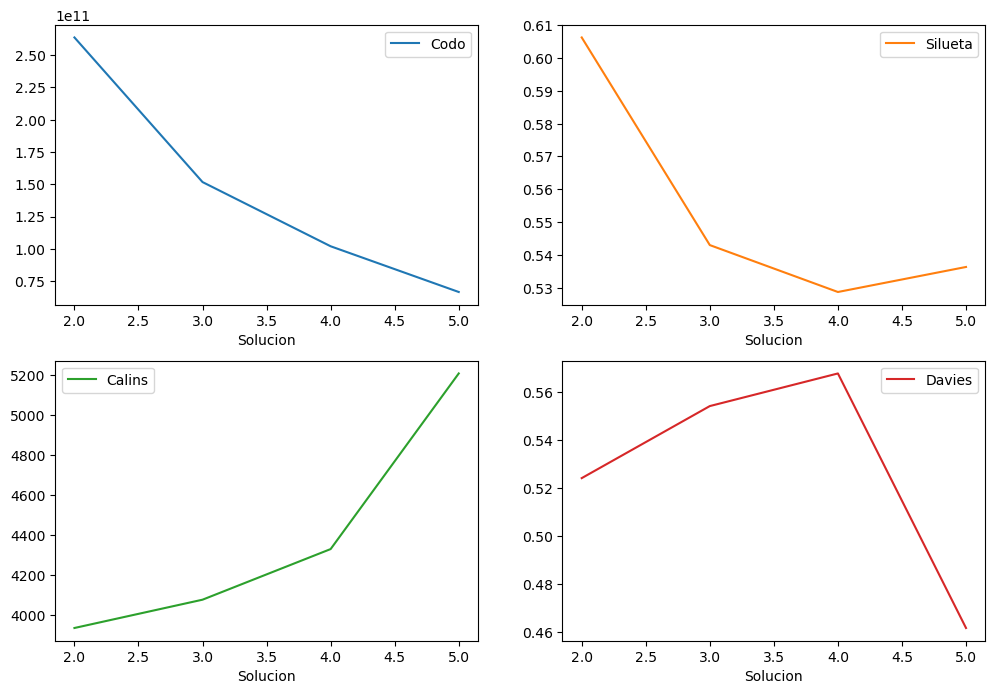

In [302]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

Parece que estaría entre 4 y 5 sería el mejor número para los clúster.

In [303]:
k =5
# Instanciar el pipeline con el preprocesador y KMeans
pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('kmeans', KMeans(random_state=42, n_clusters=k, n_init=10))
   ])
    
# Entrenar el pipeline
pipeline.fit(train_set)
    
# Obtenemos los datos transformados del paso 'preprocessor'
X_transformed = pipeline.named_steps['preprocessor'].transform(train_set)
    
# Reducir las dimensiones a 2D usando PCA para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Obtenemos las etiquetas del cluster del paso 'kmeans'
labels = pipeline.named_steps['kmeans'].labels_

# Si deseas añadir las etiquetas de los clusters al DataFrame original
train_set['Cluster'] = labels

# Obtenemos los centroides de los clusters en el espacio PCA
cluster_centers = pipeline.named_steps['kmeans'].cluster_centers_
cluster_centers_pca = pca.transform(cluster_centers)

In [304]:
train_set['Cluster'].value_counts()

Cluster
2    519
3    503
1    386
0    375
4      6
Name: count, dtype: int64

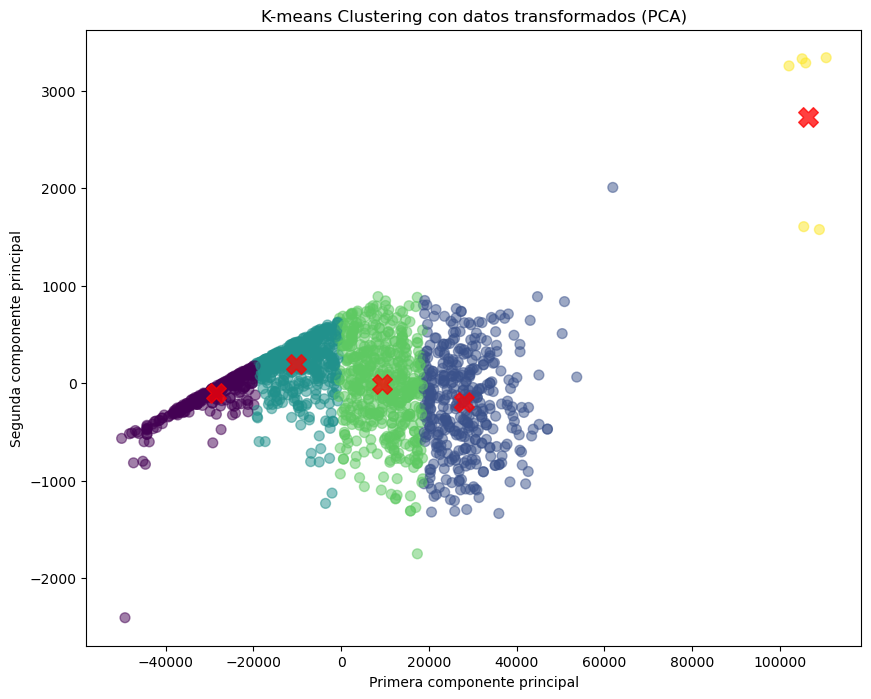

In [305]:
# Crear una figura para los datos transformados con PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering con datos transformados (PCA)')
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.show()

Elijo 4 dado que con 5 se me queda un último clúster muy pequeño (solo 7 personas)

## Análisis clúster con respecto a las variables

### Análisis con variables numéricas

Análisis de Income vs Cluster
****************************************


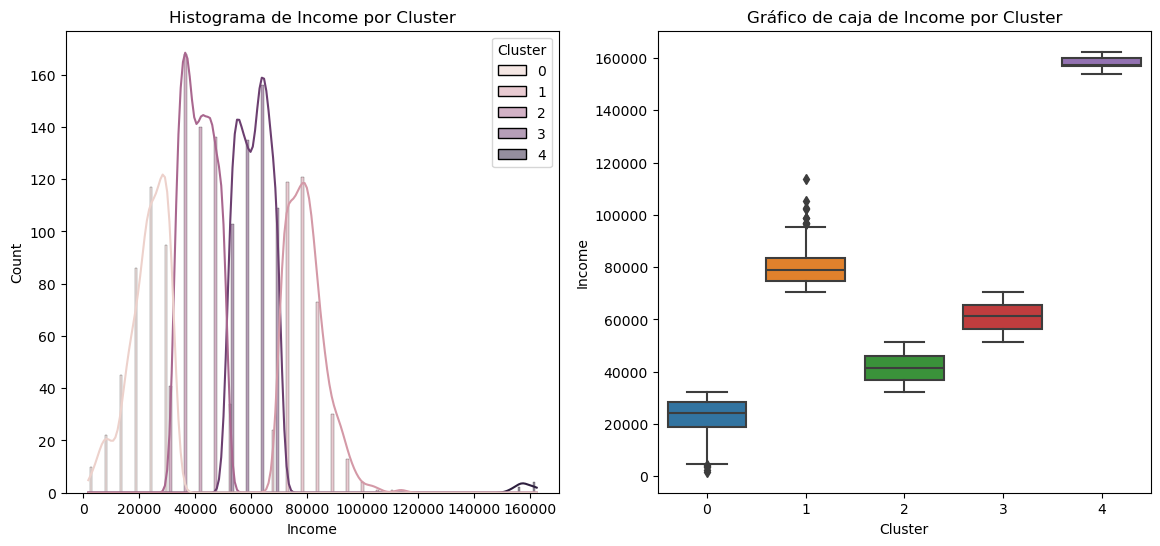

Estadísticos de resumen para Income por Cluster:
         count       mean      std       min        25%       50%       75%  \
Cluster                                                                       
0        375.0   23111.97  6864.12    1730.0   18983.00   24206.0   28538.5   
1        386.0   79786.15  6879.71   70421.0   74656.75   78920.0   83400.5   
2        519.0   41464.06  5441.09   32313.0   36726.62   41437.0   46097.5   
3        503.0   61032.71  5468.76   51250.0   56155.00   61346.0   65509.0   
4          6.0  158170.67  3014.35  153924.0  157003.75  157488.0  160035.5   

              max  
Cluster            
0         32303.0  
1        113734.0  
2         51195.0  
3         70379.0  
4        162397.0  

ANOVA para Income:
Estadístico F: 5232.84
p-valor: 0.000
La variable Income está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Kidhome vs Cluster
****************************************


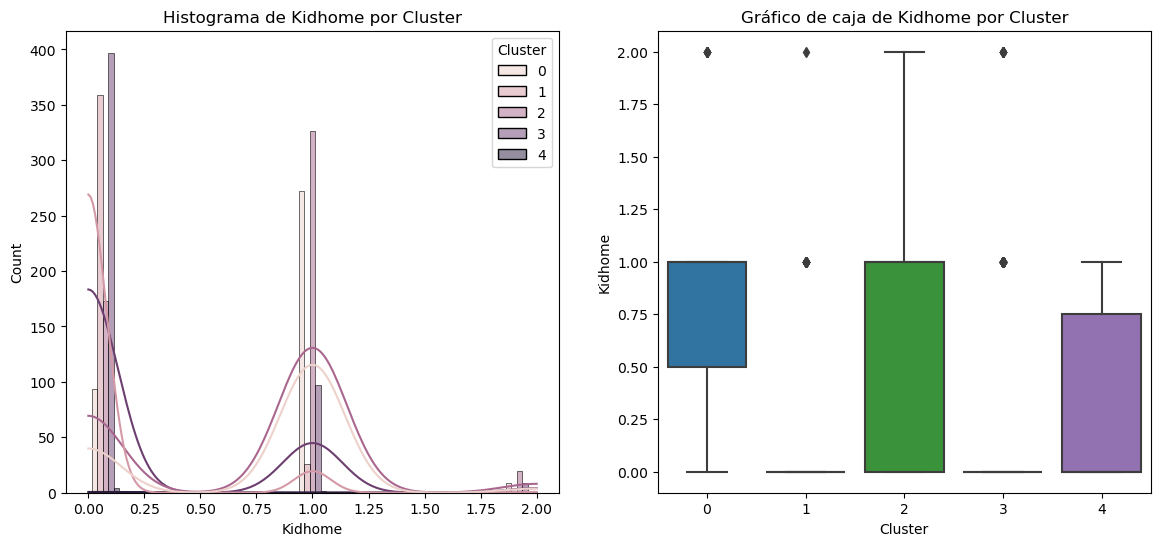

Estadísticos de resumen para Kidhome por Cluster:
         count  mean   std  min  25%  50%   75%  max
Cluster                                             
0        375.0  0.77  0.47  0.0  0.5  1.0  1.00  2.0
1        386.0  0.07  0.27  0.0  0.0  0.0  0.00  2.0
2        519.0  0.71  0.53  0.0  0.0  1.0  1.00  2.0
3        503.0  0.23  0.46  0.0  0.0  0.0  0.00  2.0
4          6.0  0.33  0.52  0.0  0.0  0.0  0.75  1.0

ANOVA para Kidhome:
Estadístico F: 185.28
p-valor: 0.000
La variable Kidhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Teenhome vs Cluster
****************************************


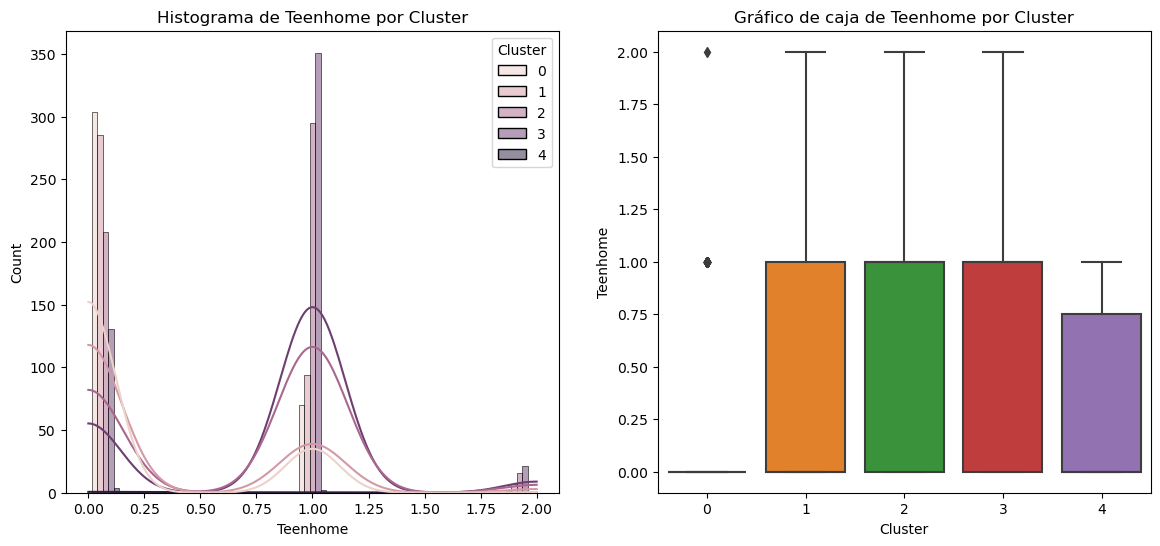

Estadísticos de resumen para Teenhome por Cluster:
         count  mean   std  min  25%  50%   75%  max
Cluster                                             
0        375.0  0.19  0.40  0.0  0.0  0.0  0.00  2.0
1        386.0  0.28  0.49  0.0  0.0  0.0  1.00  2.0
2        519.0  0.63  0.54  0.0  0.0  1.0  1.00  2.0
3        503.0  0.78  0.50  0.0  0.0  1.0  1.00  2.0
4          6.0  0.33  0.52  0.0  0.0  0.0  0.75  1.0

ANOVA para Teenhome:
Estadístico F: 105.81
p-valor: 0.000
La variable Teenhome está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Recency vs Cluster
****************************************


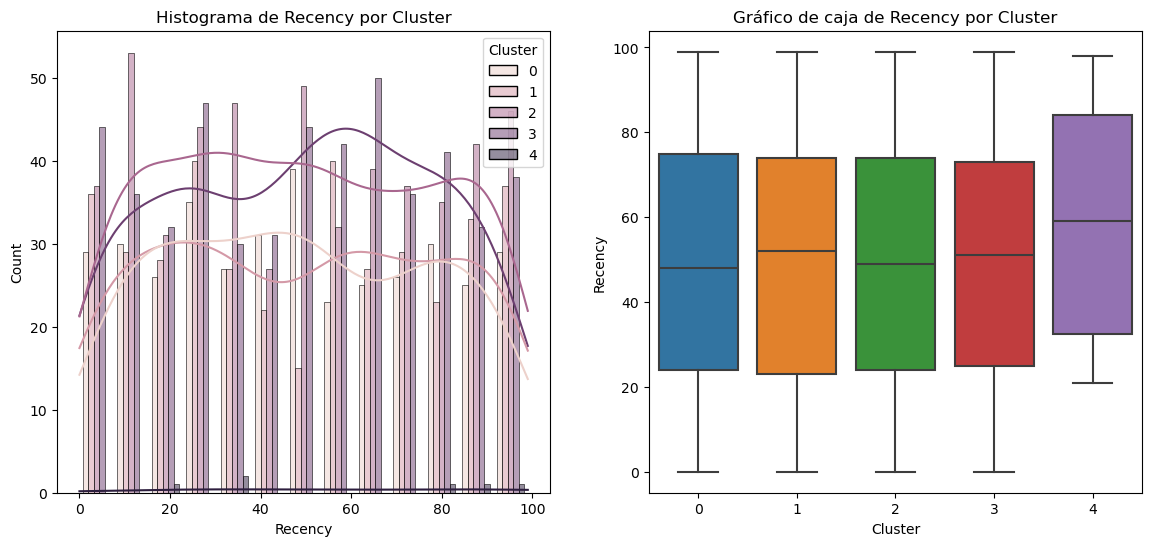

Estadísticos de resumen para Recency por Cluster:
         count   mean    std   min   25%   50%   75%   max
Cluster                                                   
0        375.0  48.51  28.39   0.0  24.0  48.0  75.0  99.0
1        386.0  49.14  30.00   0.0  23.0  52.0  74.0  99.0
2        519.0  49.07  29.19   0.0  24.0  49.0  74.0  99.0
3        503.0  49.29  28.49   0.0  25.0  51.0  73.0  99.0
4          6.0  58.83  32.84  21.0  32.5  59.0  84.0  98.0

ANOVA para Recency:
Estadístico F: 0.21
p-valor: 0.932
La variable Recency no está significativamente asociada con Cluster (p >= 0.05).

Análisis de MntWines vs Cluster
****************************************


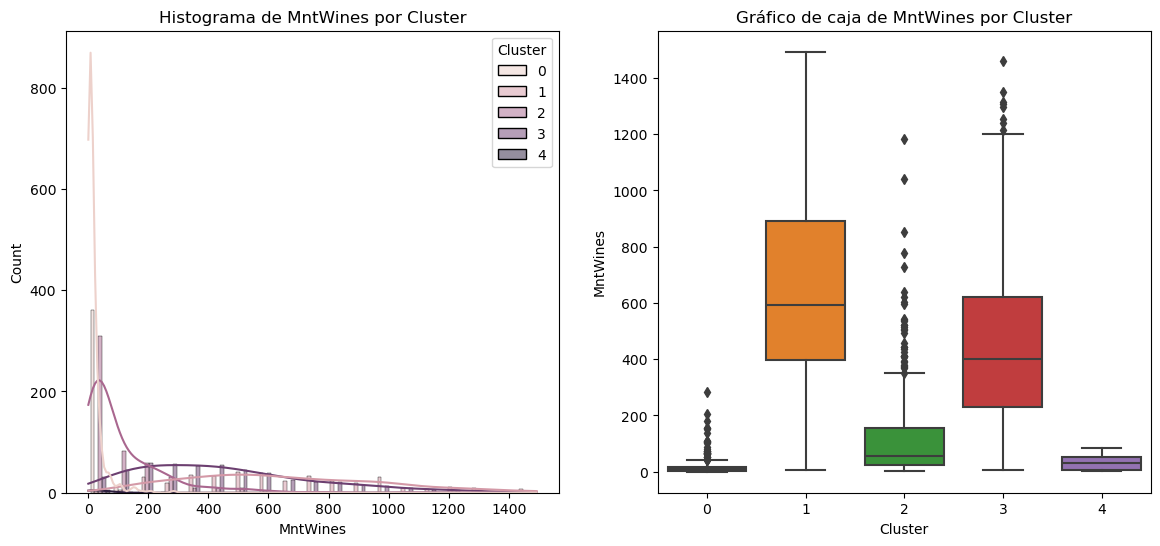

Estadísticos de resumen para MntWines por Cluster:
         count    mean     std  min     25%    50%    75%     max
Cluster                                                          
0        375.0   18.09   29.88  0.0    4.00    9.0   18.5   284.0
1        386.0  645.16  328.82  6.0  395.75  594.0  893.0  1493.0
2        519.0  111.93  145.17  2.0   22.50   56.0  154.0  1181.0
3        503.0  454.10  293.99  5.0  228.50  399.0  621.5  1459.0
4          6.0   33.67   32.79  1.0    6.50   29.5   51.0    85.0

ANOVA para MntWines:
Estadístico F: 493.38
p-valor: 0.000
La variable MntWines está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFruits vs Cluster
****************************************


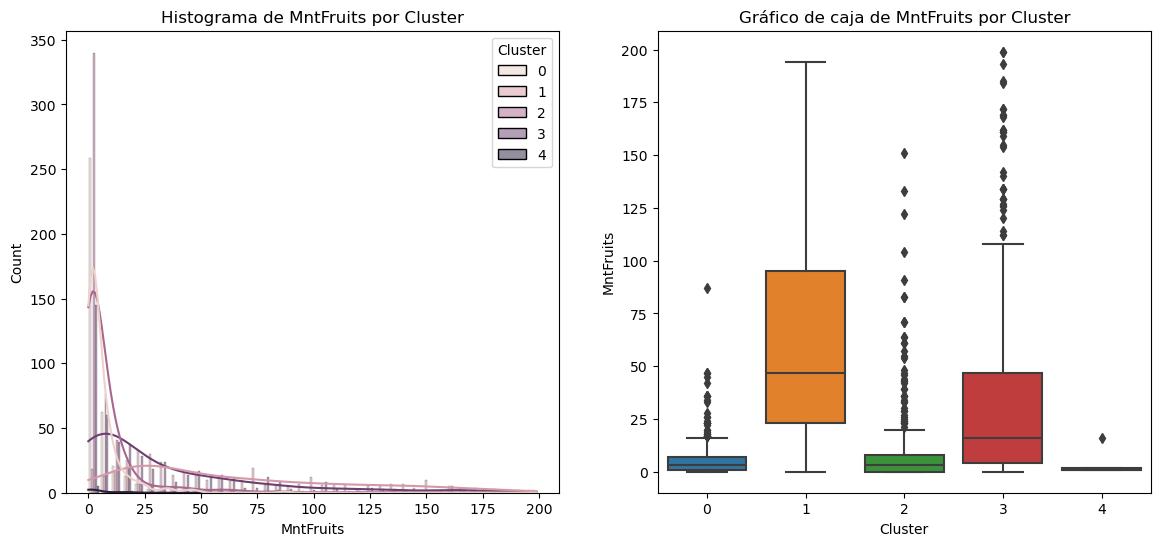

Estadísticos de resumen para MntFruits por Cluster:
         count   mean    std  min    25%   50%    75%    max
Cluster                                                     
0        375.0   5.70   8.70  0.0   1.00   3.0   7.00   87.0
1        386.0  62.80  49.22  0.0  23.25  47.0  95.25  194.0
2        519.0   8.03  16.48  0.0   0.00   3.0   8.00  151.0
3        503.0  32.42  41.10  0.0   4.00  16.0  47.00  199.0
4          6.0   3.67   6.06  1.0   1.00   1.0   1.75   16.0

ANOVA para MntFruits:
Estadístico F: 198.66
p-valor: 0.000
La variable MntFruits está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntMeatProducts vs Cluster
****************************************


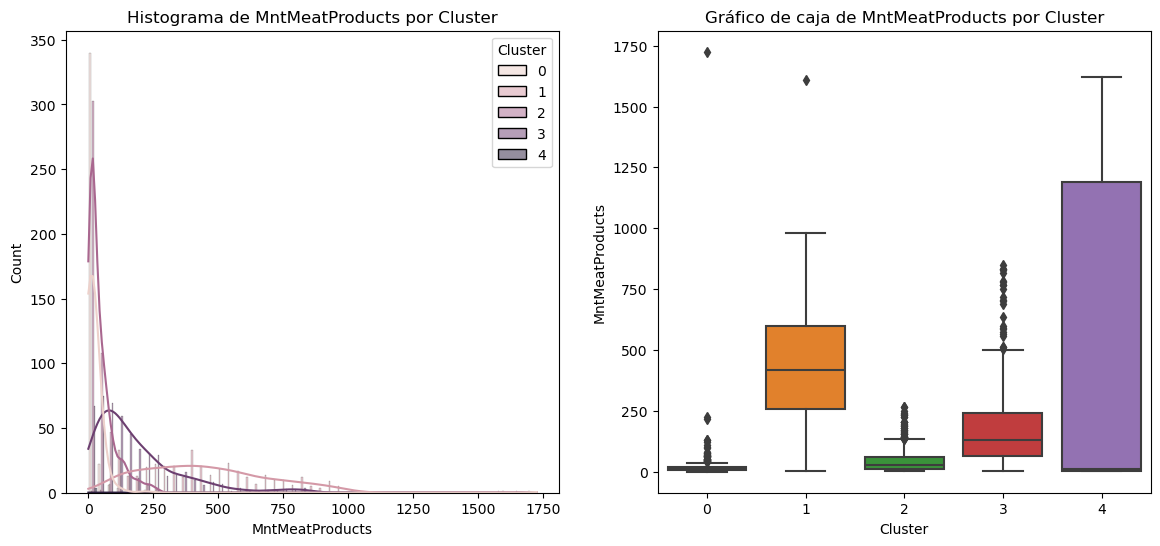

Estadísticos de resumen para MntMeatProducts por Cluster:
         count    mean     std  min     25%    50%     75%     max
Cluster                                                           
0        375.0   22.48   91.35  0.0    7.00   11.0    19.0  1725.0
1        386.0  445.49  239.11  3.0  256.25  416.0   596.5  1607.0
2        519.0   45.80   50.44  1.0   11.00   26.0    60.0   267.0
3        503.0  179.11  164.10  3.0   65.50  132.0   240.5   849.0
4          6.0  538.67  823.77  1.0    3.75   12.5  1190.5  1622.0

ANOVA para MntMeatProducts:
Estadístico F: 476.16
p-valor: 0.000
La variable MntMeatProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntFishProducts vs Cluster
****************************************


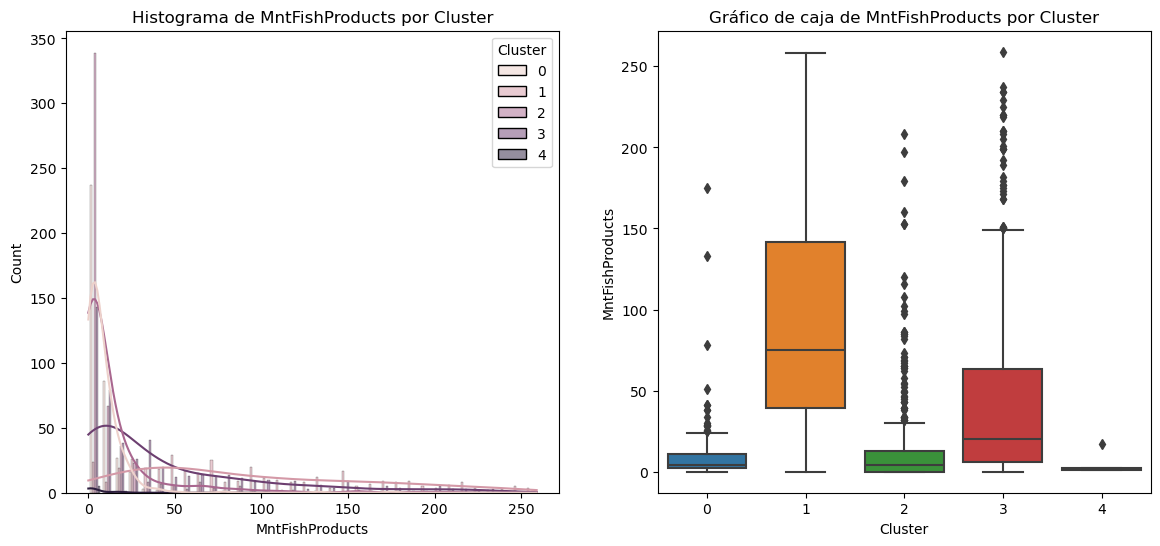

Estadísticos de resumen para MntFishProducts por Cluster:
         count   mean    std  min   25%   50%     75%    max
Cluster                                                     
0        375.0   8.33  13.87  0.0   2.0   4.0   11.00  175.0
1        386.0  92.47  67.35  0.0  39.0  75.0  141.75  258.0
2        519.0  13.02  25.97  0.0   0.0   4.0   12.50  208.0
3        503.0  43.52  54.04  0.0   6.0  20.0   63.50  259.0
4          6.0   4.00   6.39  1.0   1.0   1.5    2.00   17.0

ANOVA para MntFishProducts:
Estadístico F: 223.56
p-valor: 0.000
La variable MntFishProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntSweetProducts vs Cluster
****************************************


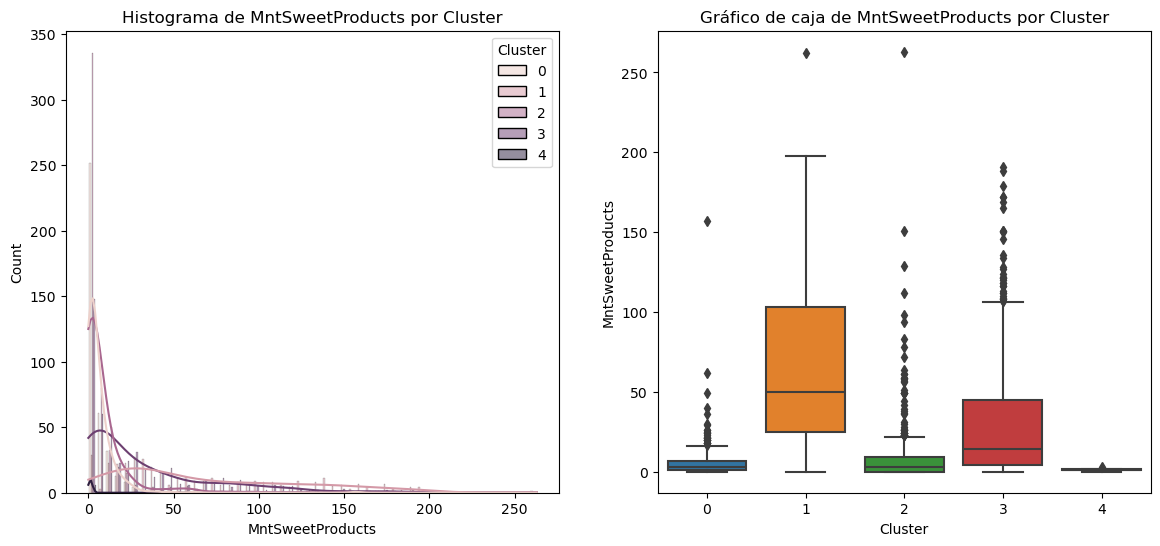

Estadísticos de resumen para MntSweetProducts por Cluster:
         count   mean    std  min   25%   50%     75%    max
Cluster                                                     
0        375.0   5.88  10.67  0.0   1.0   3.0    7.00  157.0
1        386.0  67.17  54.10  0.0  25.0  50.0  103.00  262.0
2        519.0   8.58  19.73  0.0   0.0   3.0    9.00  263.0
3        503.0  30.90  38.09  0.0   4.0  14.0   45.00  191.0
4          6.0   1.33   1.03  0.0   1.0   1.0    1.75    3.0

ANOVA para MntSweetProducts:
Estadístico F: 207.75
p-valor: 0.000
La variable MntSweetProducts está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de MntGoldProds vs Cluster
****************************************


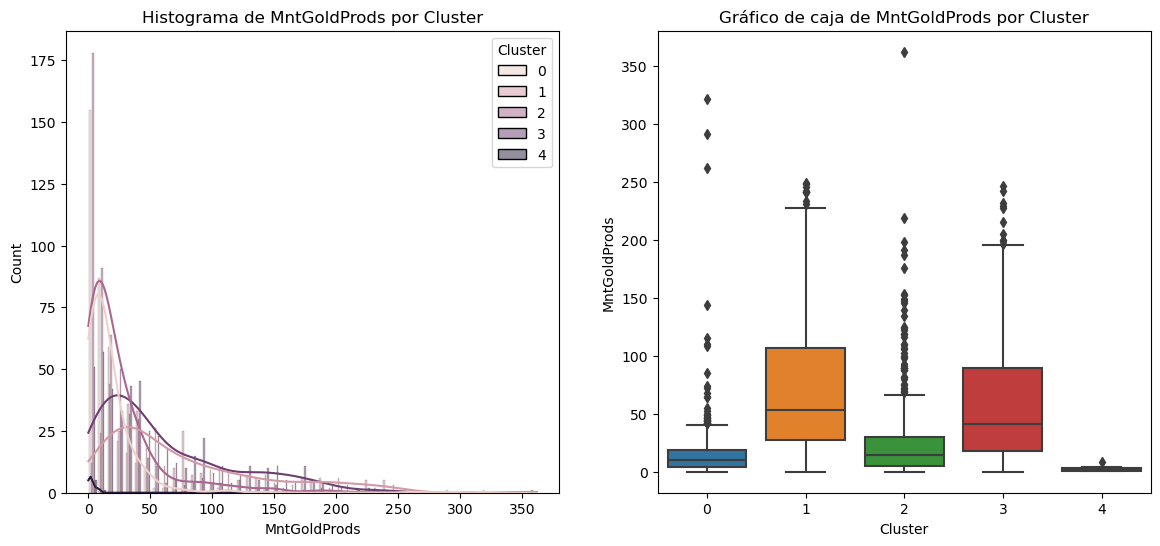

Estadísticos de resumen para MntGoldProds por Cluster:
         count   mean    std  min   25%   50%    75%    max
Cluster                                                    
0        375.0  17.19  30.40  0.0   4.0  10.0   19.0  321.0
1        386.0  73.22  62.00  0.0  27.0  53.0  107.0  249.0
2        519.0  25.39  35.75  0.0   5.0  14.0   30.0  362.0
3        503.0  59.94  54.13  0.0  18.0  41.0   89.0  246.0
4          6.0   2.83   2.79  1.0   1.0   1.5    3.5    8.0

ANOVA para MntGoldProds:
Estadístico F: 103.28
p-valor: 0.000
La variable MntGoldProds está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumDealsPurchases vs Cluster
****************************************


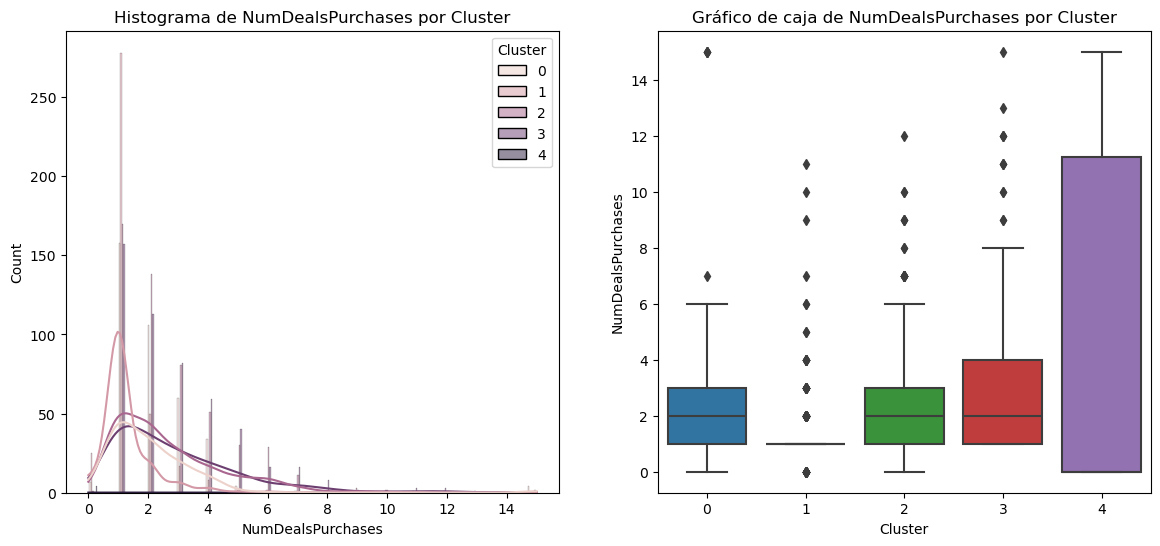

Estadísticos de resumen para NumDealsPurchases por Cluster:
         count  mean   std  min  25%  50%    75%   max
Cluster                                               
0        375.0  2.08  1.74  0.0  1.0  2.0   3.00  15.0
1        386.0  1.35  1.17  0.0  1.0  1.0   1.00  11.0
2        519.0  2.64  1.81  0.0  1.0  2.0   3.00  12.0
3        503.0  2.93  2.19  1.0  1.0  2.0   4.00  15.0
4          6.0  5.00  7.75  0.0  0.0  0.0  11.25  15.0

ANOVA para NumDealsPurchases:
Estadístico F: 49.02
p-valor: 0.000
La variable NumDealsPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebPurchases vs Cluster
****************************************


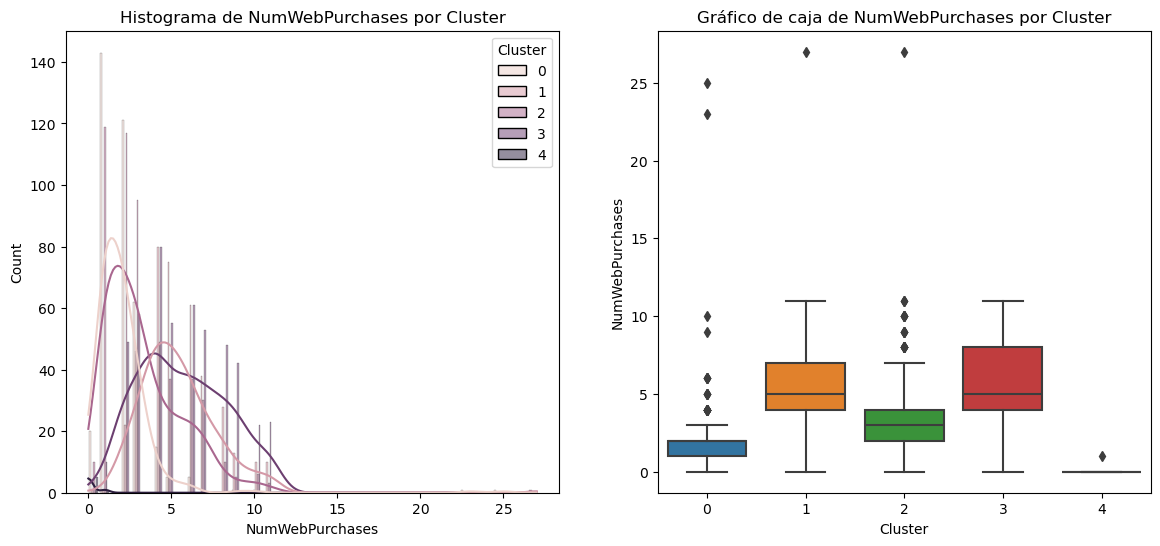

Estadísticos de resumen para NumWebPurchases por Cluster:
         count  mean   std  min  25%  50%  75%   max
Cluster                                             
0        375.0  2.01  2.04  0.0  1.0  2.0  2.0  25.0
1        386.0  5.41  2.39  0.0  4.0  5.0  7.0  27.0
2        519.0  3.27  2.47  0.0  2.0  3.0  4.0  27.0
3        503.0  5.66  2.64  0.0  4.0  5.0  8.0  11.0
4          6.0  0.17  0.41  0.0  0.0  0.0  0.0   1.0

ANOVA para NumWebPurchases:
Estadístico F: 170.80
p-valor: 0.000
La variable NumWebPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumCatalogPurchases vs Cluster
****************************************


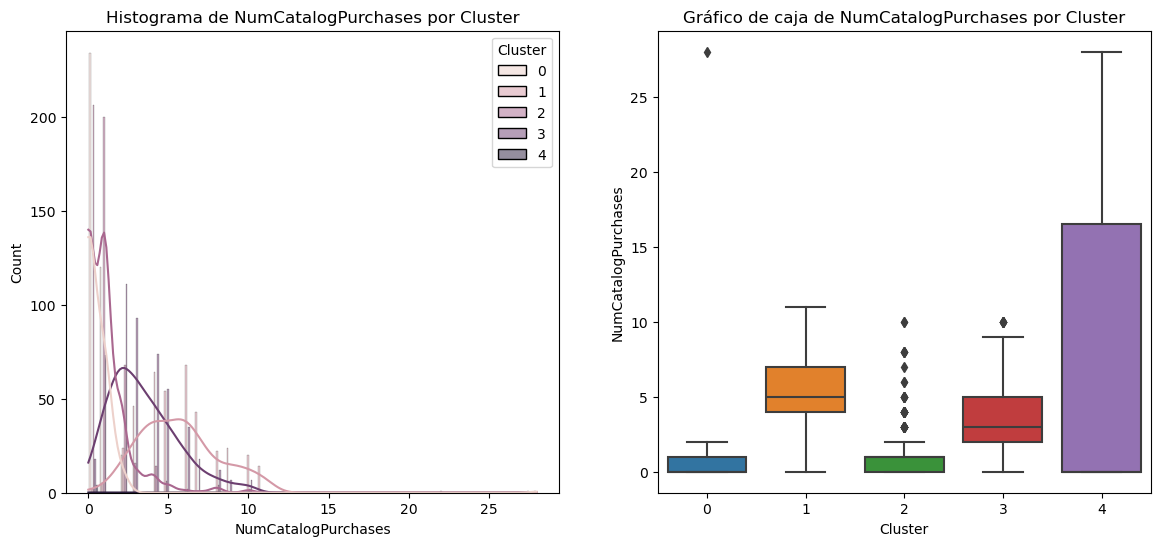

Estadísticos de resumen para NumCatalogPurchases por Cluster:
         count  mean    std  min  25%  50%   75%   max
Cluster                                               
0        375.0  0.50   1.54  0.0  0.0  0.0   1.0  28.0
1        386.0  5.63   2.43  0.0  4.0  5.0   7.0  11.0
2        519.0  1.04   1.39  0.0  0.0  1.0   1.0  10.0
3        503.0  3.40   2.13  0.0  2.0  3.0   5.0  10.0
4          6.0  8.33  13.05  0.0  0.0  0.0  16.5  28.0

ANOVA para NumCatalogPurchases:
Estadístico F: 426.25
p-valor: 0.000
La variable NumCatalogPurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumStorePurchases vs Cluster
****************************************


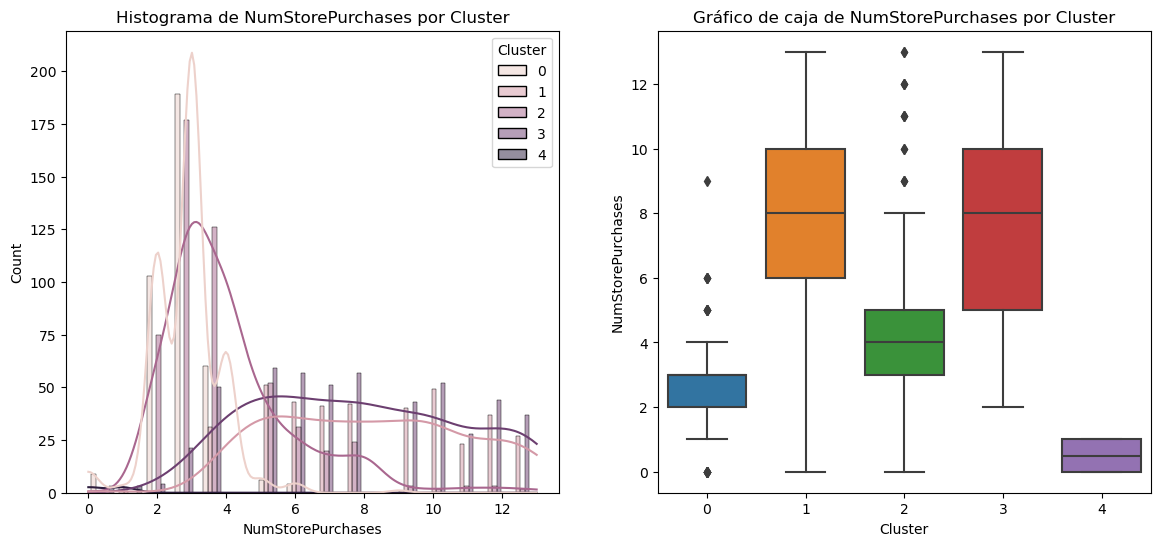

Estadísticos de resumen para NumStorePurchases por Cluster:
         count  mean   std  min  25%  50%   75%   max
Cluster                                              
0        375.0  2.88  0.96  0.0  2.0  3.0   3.0   9.0
1        386.0  8.18  2.78  0.0  6.0  8.0  10.0  13.0
2        519.0  4.06  1.90  0.0  3.0  4.0   5.0  13.0
3        503.0  7.84  2.96  2.0  5.0  8.0  10.0  13.0
4          6.0  0.50  0.55  0.0  0.0  0.5   1.0   1.0

ANOVA para NumStorePurchases:
Estadístico F: 429.08
p-valor: 0.000
La variable NumStorePurchases está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de NumWebVisitsMonth vs Cluster
****************************************


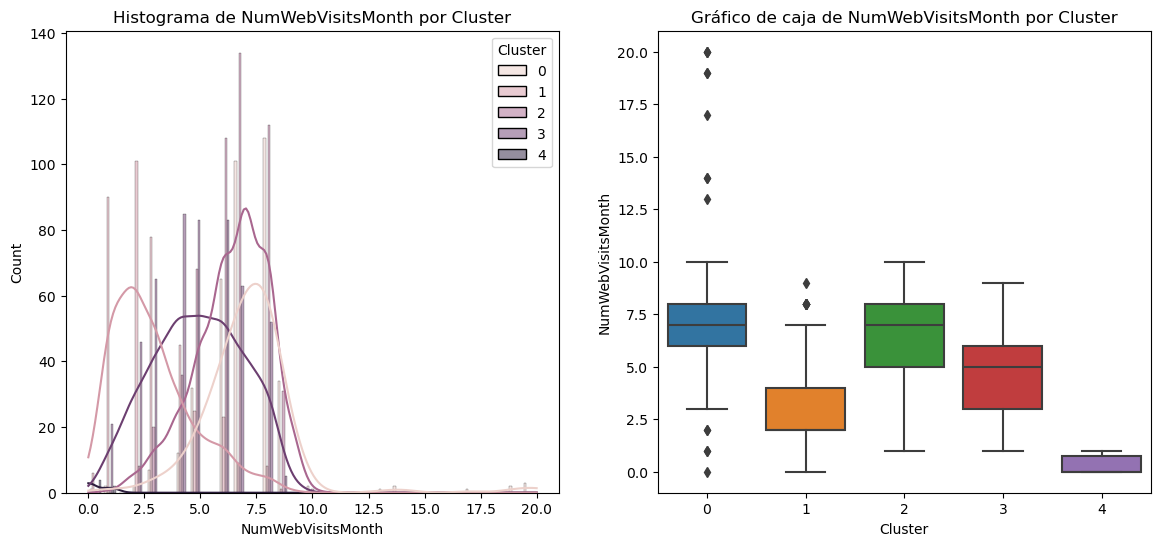

Estadísticos de resumen para NumWebVisitsMonth por Cluster:
         count  mean   std  min  25%  50%   75%   max
Cluster                                              
0        375.0  7.14  2.23  0.0  6.0  7.0  8.00  20.0
1        386.0  2.86  1.79  0.0  2.0  2.0  4.00   9.0
2        519.0  6.42  1.60  1.0  5.0  7.0  8.00  10.0
3        503.0  4.90  1.98  1.0  3.0  5.0  6.00   9.0
4          6.0  0.33  0.52  0.0  0.0  0.0  0.75   1.0

ANOVA para NumWebVisitsMonth:
Estadístico F: 308.85
p-valor: 0.000
La variable NumWebVisitsMonth está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp3 vs Cluster
****************************************


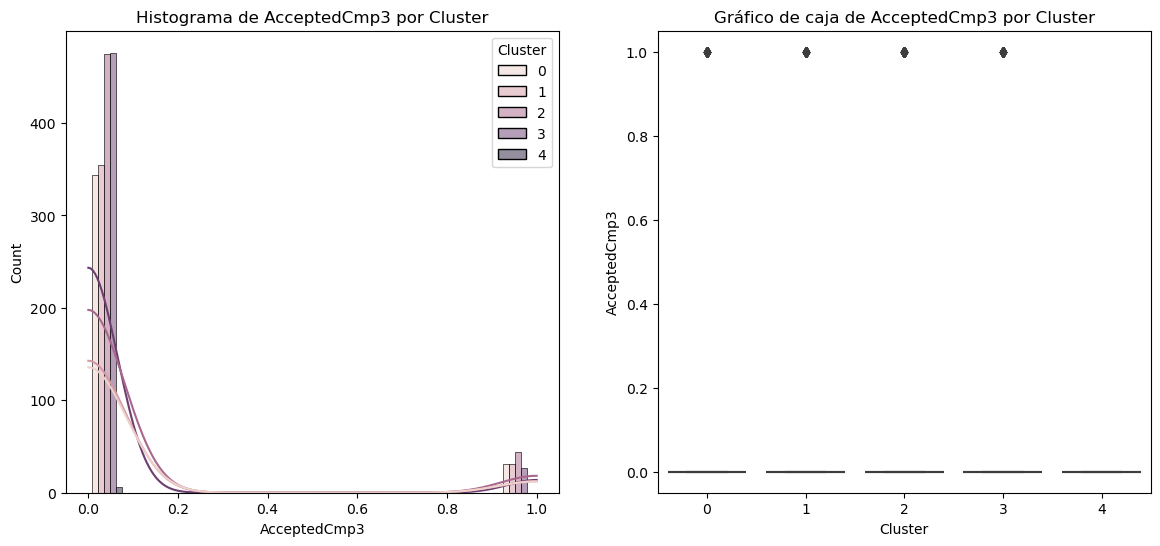

Estadísticos de resumen para AcceptedCmp3 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.08  0.28  0.0  0.0  0.0  0.0  1.0
1        386.0  0.08  0.27  0.0  0.0  0.0  0.0  1.0
2        519.0  0.08  0.28  0.0  0.0  0.0  0.0  1.0
3        503.0  0.05  0.23  0.0  0.0  0.0  0.0  1.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para AcceptedCmp3:
Estadístico F: 1.25
p-valor: 0.288
La variable AcceptedCmp3 no está significativamente asociada con Cluster (p >= 0.05).

Análisis de AcceptedCmp4 vs Cluster
****************************************


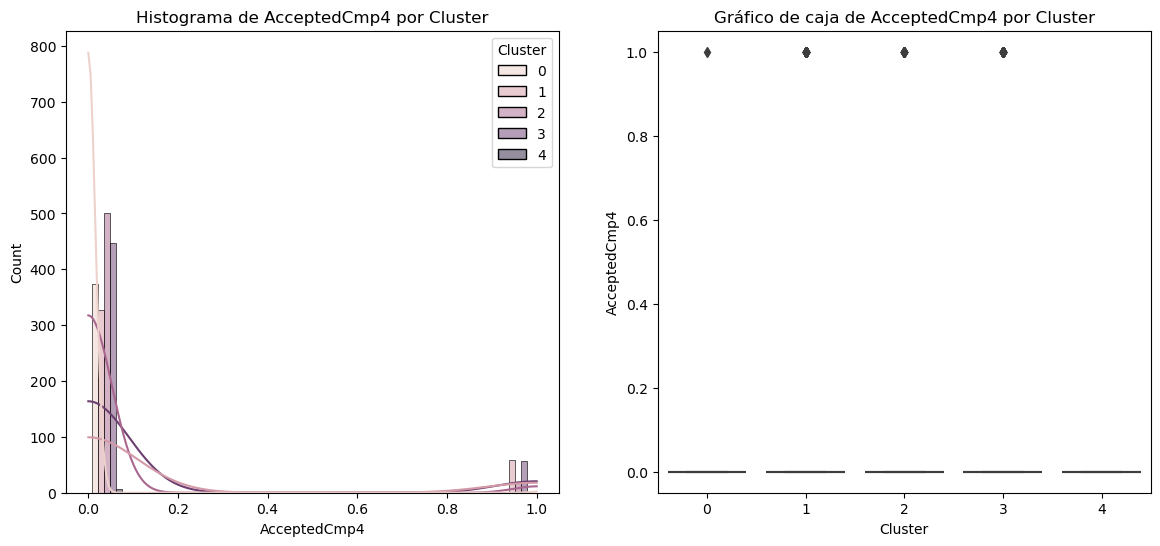

Estadísticos de resumen para AcceptedCmp4 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.00  0.05  0.0  0.0  0.0  0.0  1.0
1        386.0  0.15  0.36  0.0  0.0  0.0  0.0  1.0
2        519.0  0.03  0.18  0.0  0.0  0.0  0.0  1.0
3        503.0  0.11  0.31  0.0  0.0  0.0  0.0  1.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para AcceptedCmp4:
Estadístico F: 22.06
p-valor: 0.000
La variable AcceptedCmp4 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp5 vs Cluster
****************************************


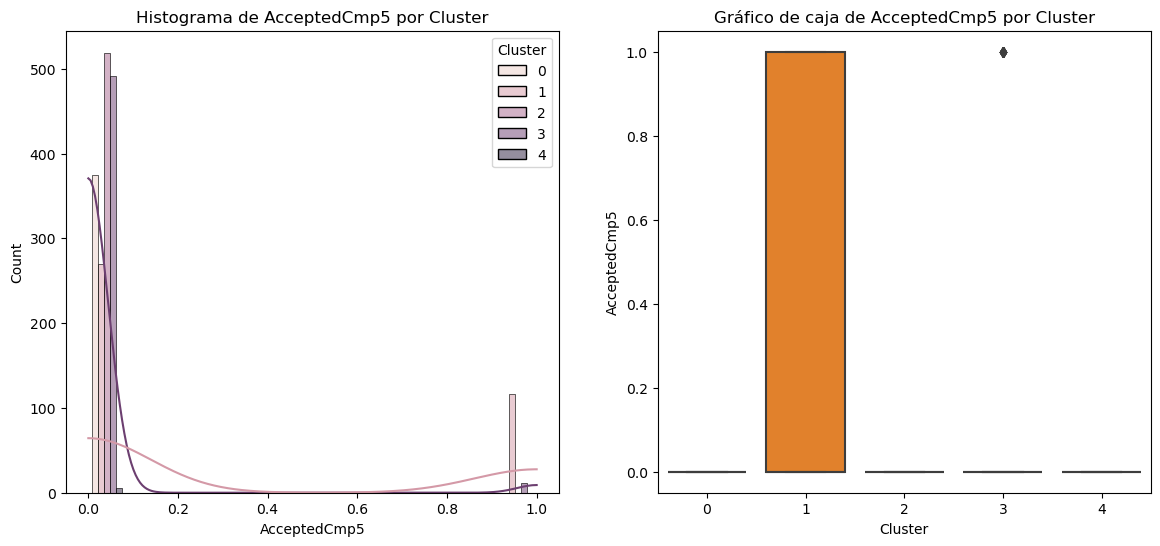

Estadísticos de resumen para AcceptedCmp5 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0
1        386.0  0.30  0.46  0.0  0.0  0.0  1.0  1.0
2        519.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0
3        503.0  0.02  0.15  0.0  0.0  0.0  0.0  1.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para AcceptedCmp5:
Estadístico F: 124.83
p-valor: 0.000
La variable AcceptedCmp5 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp1 vs Cluster
****************************************


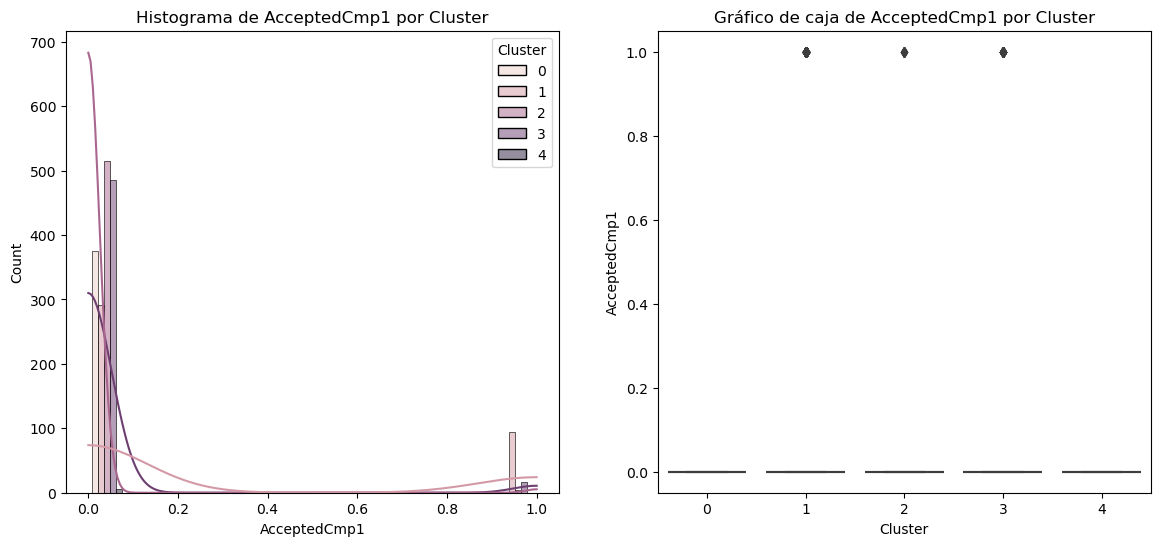

Estadísticos de resumen para AcceptedCmp1 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0
1        386.0  0.25  0.43  0.0  0.0  0.0  0.0  1.0
2        519.0  0.01  0.09  0.0  0.0  0.0  0.0  1.0
3        503.0  0.03  0.18  0.0  0.0  0.0  0.0  1.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para AcceptedCmp1:
Estadístico F: 79.81
p-valor: 0.000
La variable AcceptedCmp1 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de AcceptedCmp2 vs Cluster
****************************************


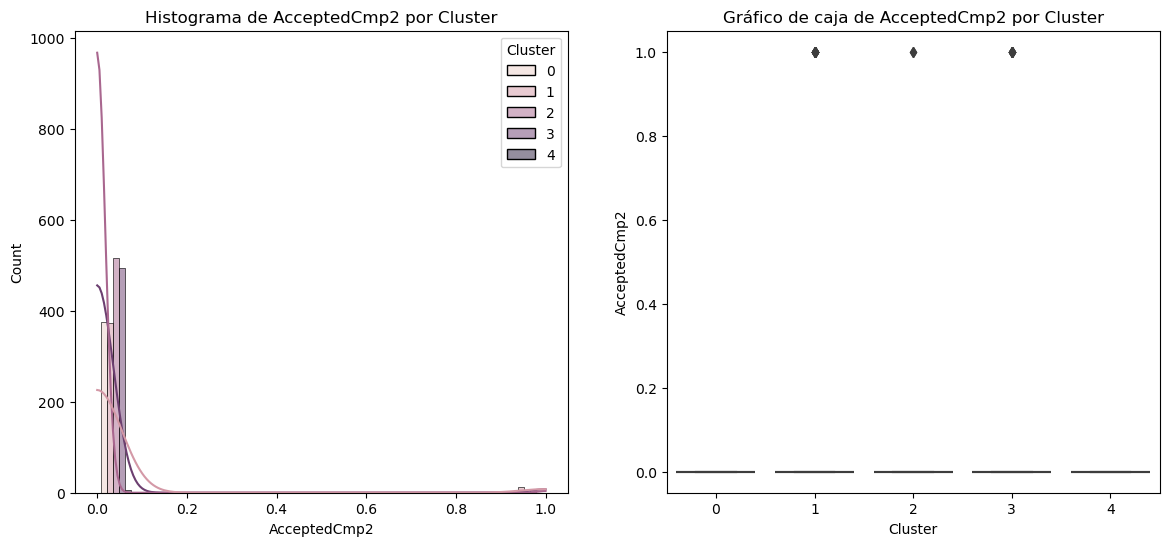

Estadísticos de resumen para AcceptedCmp2 por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0
1        386.0  0.03  0.18  0.0  0.0  0.0  0.0  1.0
2        519.0  0.00  0.06  0.0  0.0  0.0  0.0  1.0
3        503.0  0.02  0.13  0.0  0.0  0.0  0.0  1.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para AcceptedCmp2:
Estadístico F: 5.51
p-valor: 0.000
La variable AcceptedCmp2 está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Complain vs Cluster
****************************************


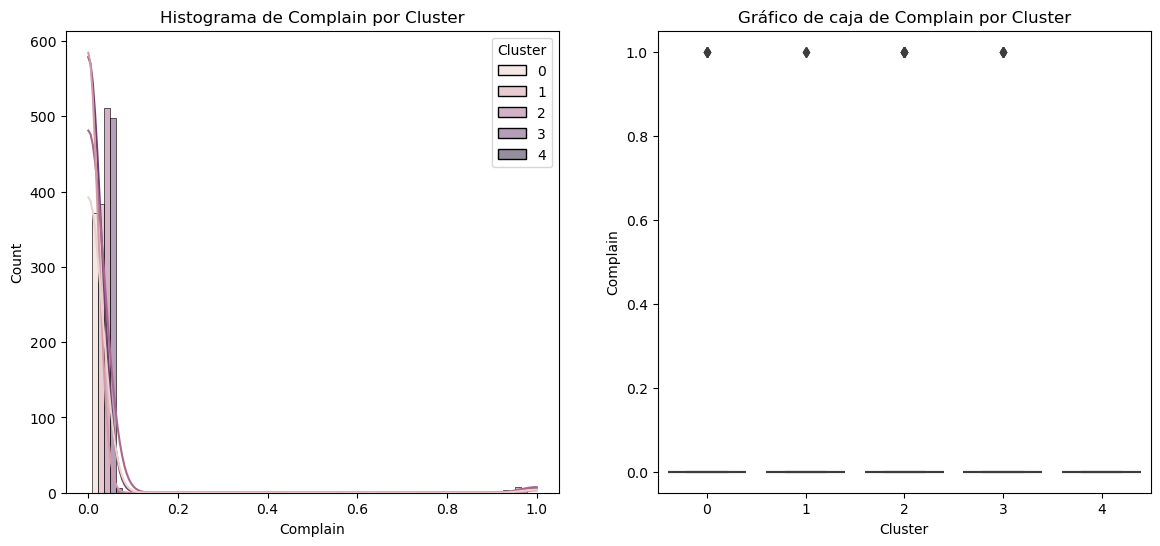

Estadísticos de resumen para Complain por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.01  0.10  0.0  0.0  0.0  0.0  1.0
1        386.0  0.01  0.07  0.0  0.0  0.0  0.0  1.0
2        519.0  0.02  0.12  0.0  0.0  0.0  0.0  1.0
3        503.0  0.01  0.10  0.0  0.0  0.0  0.0  1.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para Complain:
Estadístico F: 0.58
p-valor: 0.680
La variable Complain no está significativamente asociada con Cluster (p >= 0.05).

Análisis de Response vs Cluster
****************************************


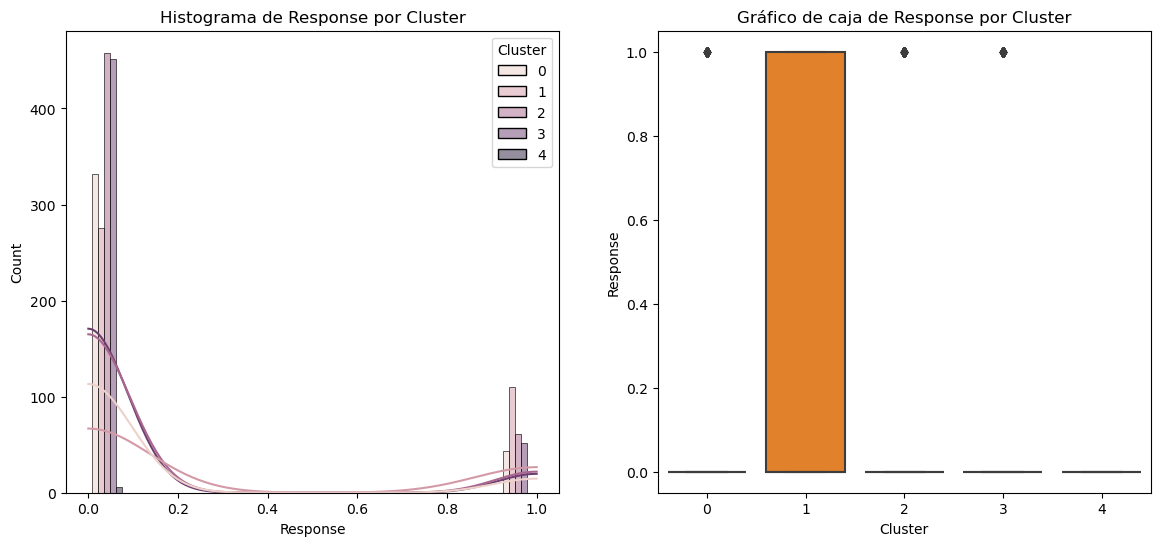

Estadísticos de resumen para Response por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.11  0.32  0.0  0.0  0.0  0.0  1.0
1        386.0  0.28  0.45  0.0  0.0  0.0  1.0  1.0
2        519.0  0.12  0.32  0.0  0.0  0.0  0.0  1.0
3        503.0  0.10  0.30  0.0  0.0  0.0  0.0  1.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para Response:
Estadístico F: 19.04
p-valor: 0.000
La variable Response está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de age vs Cluster
****************************************


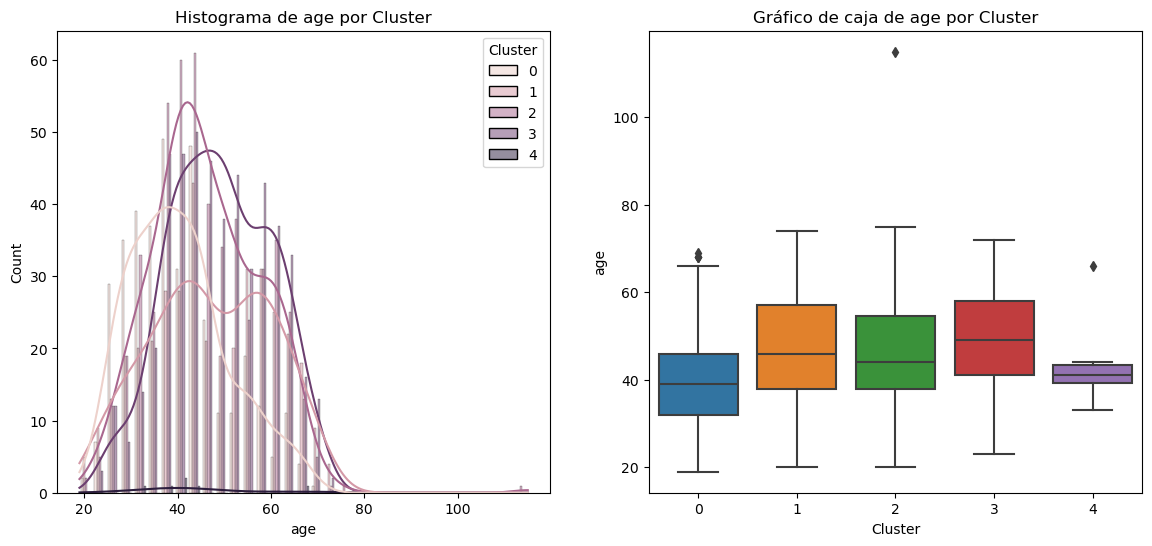

Estadísticos de resumen para age por Cluster:
         count   mean    std   min    25%   50%   75%    max
Cluster                                                     
0        375.0  40.29  10.52  19.0  32.00  39.0  46.0   69.0
1        386.0  47.17  12.90  20.0  38.00  46.0  57.0   74.0
2        519.0  46.19  11.43  20.0  38.00  44.0  54.5  115.0
3        503.0  49.09  10.76  23.0  41.00  49.0  58.0   72.0
4          6.0  44.00  11.40  33.0  39.25  41.0  43.5   66.0

ANOVA para age:
Estadístico F: 33.88
p-valor: 0.000
La variable age está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de customes_seniority vs Cluster
****************************************


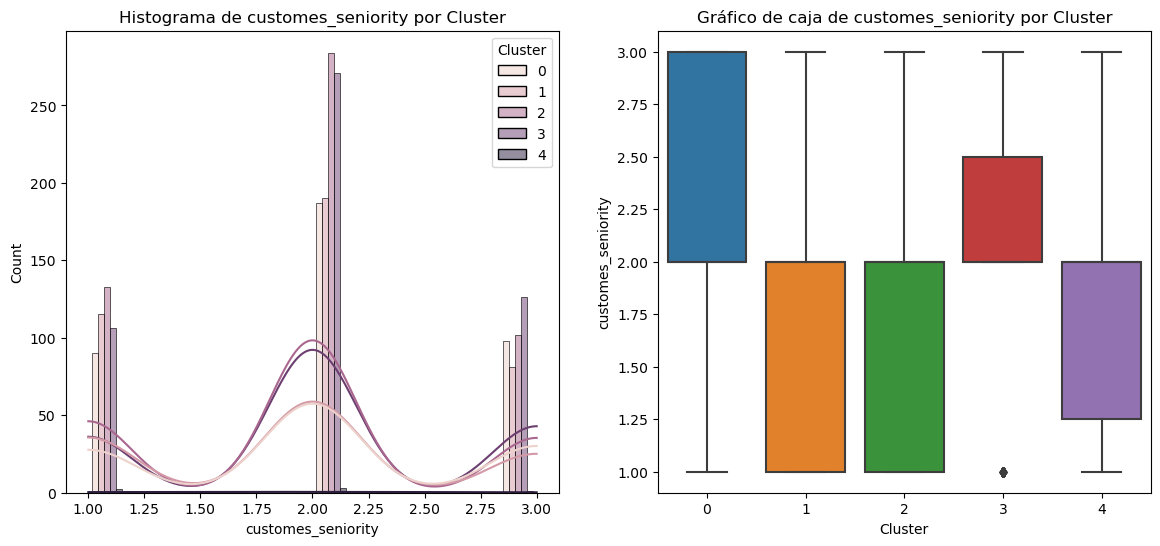

Estadísticos de resumen para customes_seniority por Cluster:
         count  mean   std  min   25%  50%  75%  max
Cluster                                             
0        375.0  2.02  0.71  1.0  2.00  2.0  3.0  3.0
1        386.0  1.91  0.71  1.0  1.00  2.0  2.0  3.0
2        519.0  1.94  0.67  1.0  1.00  2.0  2.0  3.0
3        503.0  2.04  0.68  1.0  2.00  2.0  2.5  3.0
4          6.0  1.83  0.75  1.0  1.25  2.0  2.0  3.0

ANOVA para customes_seniority:
Estadístico F: 2.72
p-valor: 0.028
La variable customes_seniority está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Household_members vs Cluster
****************************************


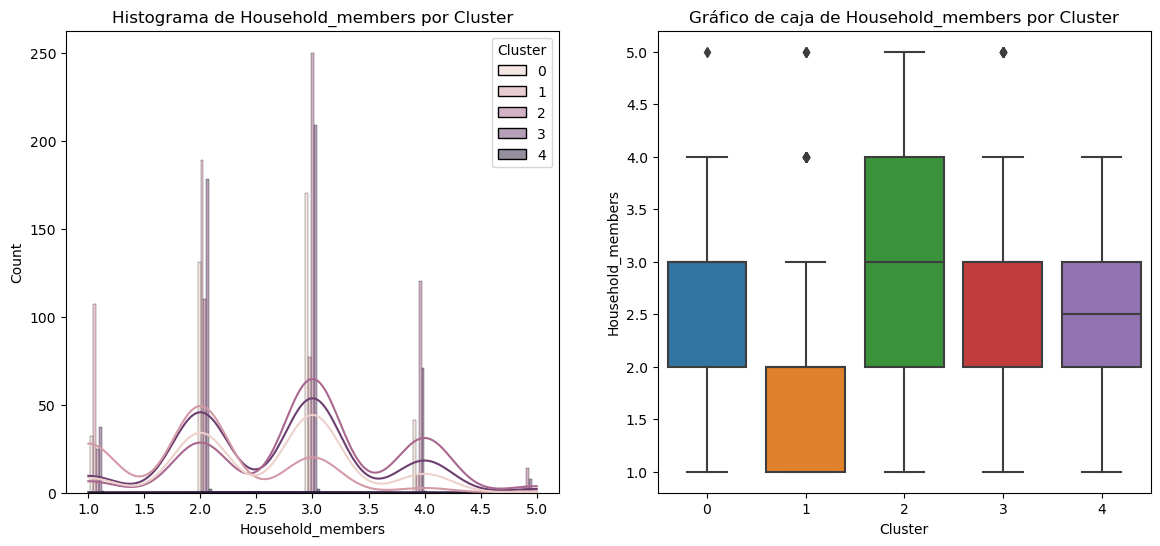

Estadísticos de resumen para Household_members por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  2.59  0.81  1.0  2.0  3.0  3.0  5.0
1        386.0  2.00  0.81  1.0  1.0  2.0  2.0  5.0
2        519.0  2.98  0.86  1.0  2.0  3.0  4.0  5.0
3        503.0  2.67  0.86  1.0  2.0  3.0  3.0  5.0
4          6.0  2.50  1.05  1.0  2.0  2.5  3.0  4.0

ANOVA para Household_members:
Estadístico F: 76.68
p-valor: 0.000
La variable Household_members está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_amount vs Cluster
****************************************


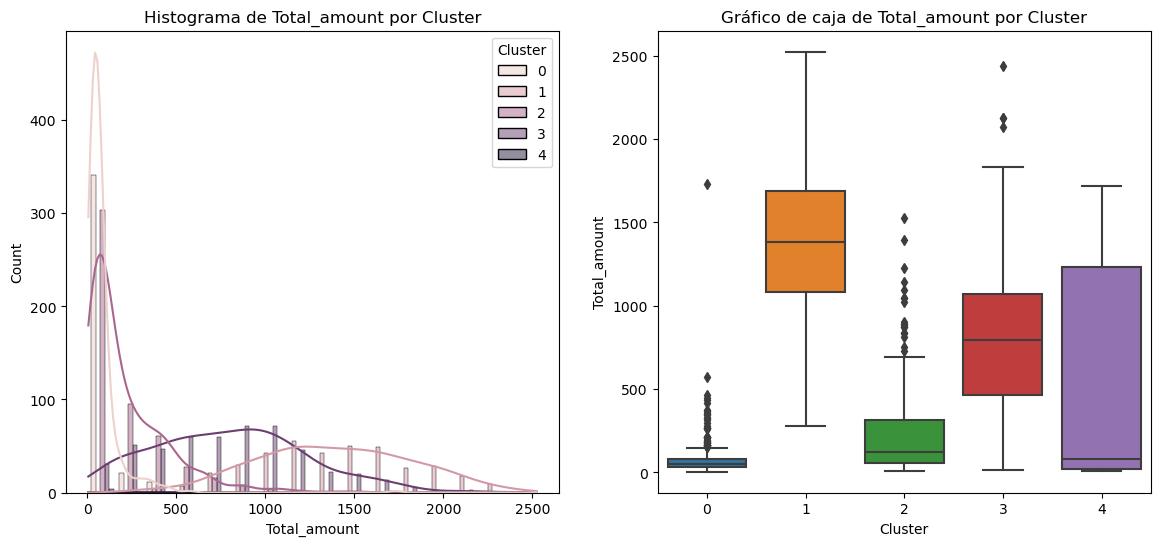

Estadísticos de resumen para Total_amount por Cluster:
         count     mean     std    min      25%     50%      75%     max
Cluster                                                                 
0        375.0    77.66  115.84    5.0    31.50    52.0    79.00  1730.0
1        386.0  1386.31  434.13  277.0  1080.75  1380.0  1689.50  2524.0
2        519.0   212.74  227.24    9.0    55.00   125.0   313.50  1526.0
3        503.0   799.99  433.12   17.0   465.00   794.0  1071.50  2440.0
4          6.0   584.17  836.81    6.0    20.75    83.0  1232.75  1717.0

ANOVA para Total_amount:
Estadístico F: 969.04
p-valor: 0.000
La variable Total_amount está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_purchase vs Cluster
****************************************


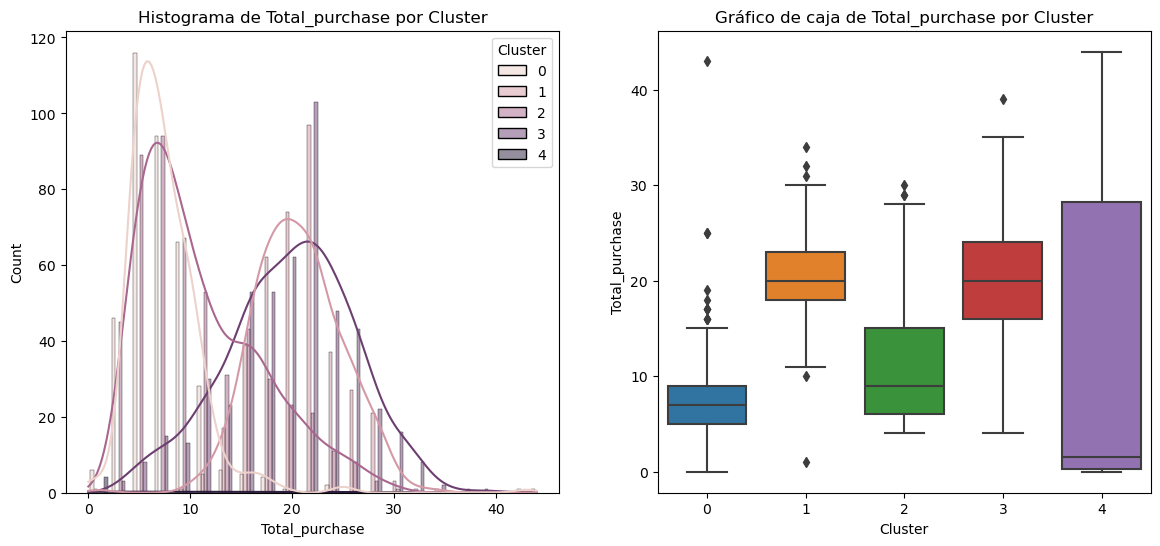

Estadísticos de resumen para Total_purchase por Cluster:
         count   mean    std  min    25%   50%    75%   max
Cluster                                                    
0        375.0   7.46   3.65  0.0   5.00   7.0   9.00  43.0
1        386.0  20.57   4.27  1.0  18.00  20.0  23.00  34.0
2        519.0  11.00   5.87  4.0   6.00   9.0  15.00  30.0
3        503.0  19.83   6.18  4.0  16.00  20.0  24.00  39.0
4          6.0  14.00  20.66  0.0   0.25   1.5  28.25  44.0

ANOVA para Total_purchase:
Estadístico F: 464.16
p-valor: 0.000
La variable Total_purchase está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Análisis de Total_cmp vs Cluster
****************************************


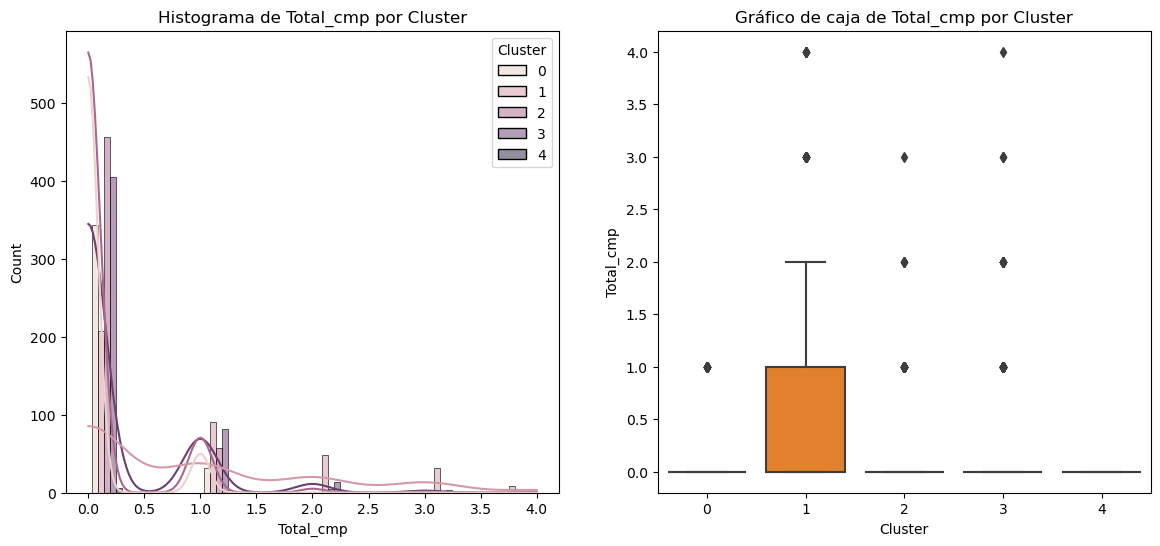

Estadísticos de resumen para Total_cmp por Cluster:
         count  mean   std  min  25%  50%  75%  max
Cluster                                            
0        375.0  0.09  0.28  0.0  0.0  0.0  0.0  1.0
1        386.0  0.81  1.07  0.0  0.0  0.0  1.0  4.0
2        519.0  0.13  0.38  0.0  0.0  0.0  0.0  3.0
3        503.0  0.24  0.54  0.0  0.0  0.0  0.0  4.0
4          6.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0

ANOVA para Total_cmp:
Estadístico F: 87.81
p-valor: 0.000
La variable Total_cmp está significativamente asociada con Cluster (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'age', 'customes_seniority', 'Household_members', 'Total_amount',

In [306]:
target = 'Cluster'

analisis_bivariable_numericas_categorica(train_set,target,features_num)

### Análisis con las variables categóricas

Análisis de Education vs Cluster
****************************************


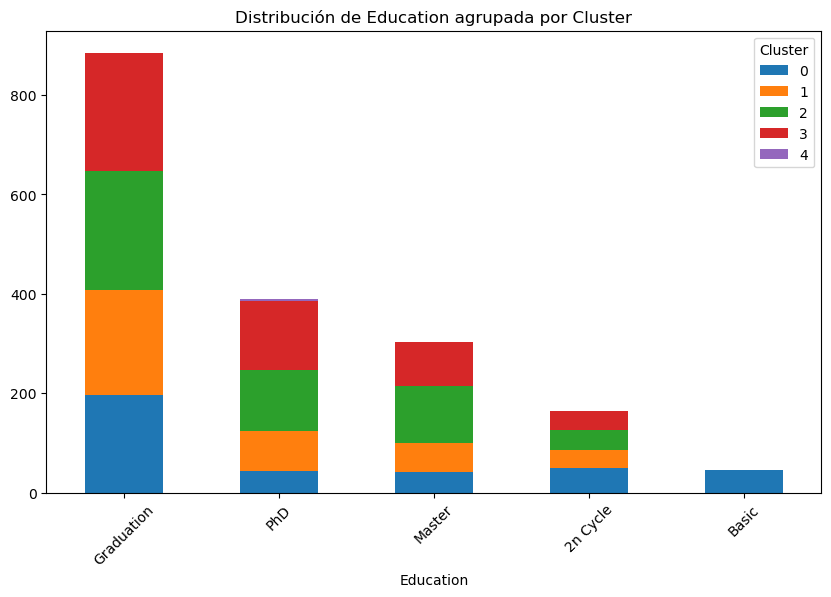

Tabla de contingencia de Education vs Cluster:
Cluster       0    1    2    3  4
Education                        
Graduation  196  211  239  238  1
PhD          44   81  121  139  4
Master       41   58  116   88  1
2n Cycle     49   36   42   38  0
Basic        45    0    1    0  0

Tabla de porcentajes de Education respecto a Cluster:
Cluster             0          1          2          3          4
Education                                                        
Graduation  52.266667  54.663212  46.050096  47.316103  16.666667
PhD         11.733333  20.984456  23.314066  27.634195  66.666667
Master      10.933333  15.025907  22.350674  17.495030  16.666667
2n Cycle    13.066667   9.326425   8.092486   7.554672   0.000000
Basic       12.000000   0.000000   0.192678   0.000000   0.000000

Tabla de frecuencias para Education:
            Frecuencia Absoluta  Frecuencia Relativa (%)
Education                                               
Graduation                  885               

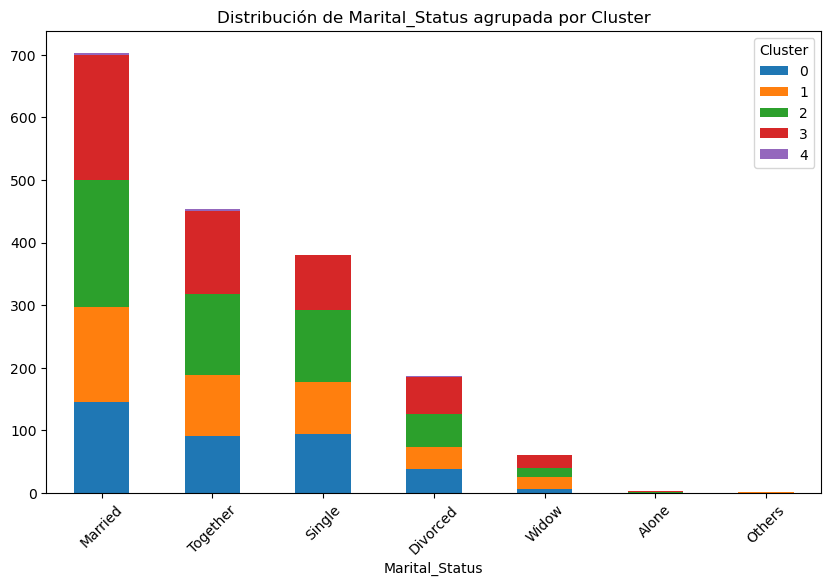

Tabla de contingencia de Marital_Status vs Cluster:
Cluster           0    1    2    3  4
Marital_Status                       
Married         145  152  203  200  3
Together         91   97  130  133  2
Single           94   83  116   87  0
Divorced         38   35   53   60  1
Widow             7   18   15   21  0
Alone             0    0    2    1  0
Others            0    1    0    1  0

Tabla de porcentajes de Marital_Status respecto a Cluster:
Cluster                 0          1          2          3          4
Marital_Status                                                       
Married         38.666667  39.378238  39.113680  39.761431  50.000000
Together        24.266667  25.129534  25.048170  26.441352  33.333333
Single          25.066667  21.502591  22.350674  17.296223   0.000000
Divorced        10.133333   9.067358  10.211946  11.928429  16.666667
Widow            1.866667   4.663212   2.890173   4.174950   0.000000
Alone            0.000000   0.000000   0.385356   0.1988

In [307]:
analisis_bivariable_categoricas_categorica(train_set,target,features_cat)

### Otros análisis

#### Cluster_0

In [308]:
cluster_0 = train_set.loc[train_set['Cluster']==0]
cluster_0.describe().T.round(2)

count      mean      std     min      25%      50%  \
Income               375.0  23111.97  6864.12  1730.0  18983.0  24206.0   
Kidhome              375.0      0.77     0.47     0.0      0.5      1.0   
Teenhome             375.0      0.19     0.40     0.0      0.0      0.0   
Recency              375.0     48.51    28.39     0.0     24.0     48.0   
MntWines             375.0     18.09    29.88     0.0      4.0      9.0   
MntFruits            375.0      5.70     8.70     0.0      1.0      3.0   
MntMeatProducts      375.0     22.48    91.35     0.0      7.0     11.0   
MntFishProducts      375.0      8.33    13.87     0.0      2.0      4.0   
MntSweetProducts     375.0      5.88    10.67     0.0      1.0      3.0   
MntGoldProds         375.0     17.19    30.40     0.0      4.0     10.0   
NumDealsPurchases    375.0      2.08     1.74     0.0      1.0      2.0   
NumWebPurchases      375.0      2.01     2.04     0.0      1.0      2.0   
NumCatalogPurchases  375.0      0.50     1.54     0.0      0.0      0.0   
NumStorePurchases    375.0      2.88     0.96     0.0      2.0      3.0   
NumWebVisitsMonth    375.0      7.14     2.23     0.0      6.0      7.0   
AcceptedCmp3         375.0      0.08     0.28     0.0      0.0      0.0   
AcceptedCmp4         375.0      0.00     0.05     0.0      0.0      0.0   
AcceptedCmp5         375.0      0.00     0.00     0.0      0.0      0.0   
AcceptedCmp1         375.0      0.00     0.00     0.0      0.0      0.0   
AcceptedCmp2         375.0      0.00     0.00     0.0      0.0      0.0   
Complain             375.0      0.01     0.10     0.0      0.0      0.0   
Response             375.0      0.11     0.32     0.0      0.0      0.0   
age                  375.0     40.29    10.52    19.0     32.0     39.0   
customes_seniority   375.0      2.02     0.71     1.0      2.0      2.0   
Household_members    375.0      2.59     0.81     1.0      2.0      3.0   
Total_amount         375.0     77.66   115.84     5.0     31.5     52.0   
Total_purchase       375.0      7.46     3.65     0.0      5.0      7.0   
Total_cmp            375.0      0.09     0.28     0.0      0.0      0.0   

                         75%      max  
Income               28538.5  32303.0  
Kidhome                  1.0      2.0  
Teenhome                 0.0      2.0  
Recency                 75.0     99.0  
MntWines                18.5    284.0  
MntFruits                7.0     87.0  
MntMeatProducts         19.0   1725.0  
MntFishProducts         11.0    175.0  
MntSweetProducts         7.0    157.0  
MntGoldProds            19.0    321.0  
NumDealsPurchases        3.0     15.0  
NumWebPurchases          2.0     25.0  
NumCatalogPurchases      1.0     28.0  
NumStorePurchases        3.0      9.0  
NumWebVisitsMonth        8.0     20.0  
AcceptedCmp3             0.0      1.0  
AcceptedCmp4             0.0      1.0  
AcceptedCmp5             0.0      0.0  
AcceptedCmp1             0.0      0.0  
AcceptedCmp2             0.0      0.0  
Complain                 0.0      1.0  
Response                 0.0      1.0  
age                     46.0     69.0  
customes_seniority       3.0      3.0  
Household_members        3.0      5.0  
Total_amount            79.0   1730.0  
Total_purchase           9.0     43.0  
Total_cmp                0.0      1.0

In [309]:
cluster_0['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Single      0.25
Together    0.24
Divorced    0.10
Widow       0.02
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [310]:
cluster_0['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.52
2n Cycle      0.13
Basic         0.12
PhD           0.12
Master        0.11
Name: proportion, dtype: float64

#### Cluster_1

In [311]:
cluster_1 = train_set.loc[train_set['Cluster']==1]
cluster_1.describe().T.round(2)

count      mean      std      min       25%      50%  \
Income               386.0  79786.15  6879.71  70421.0  74656.75  78920.0   
Kidhome              386.0      0.07     0.27      0.0      0.00      0.0   
Teenhome             386.0      0.28     0.49      0.0      0.00      0.0   
Recency              386.0     49.14    30.00      0.0     23.00     52.0   
MntWines             386.0    645.16   328.82      6.0    395.75    594.0   
MntFruits            386.0     62.80    49.22      0.0     23.25     47.0   
MntMeatProducts      386.0    445.49   239.11      3.0    256.25    416.0   
MntFishProducts      386.0     92.47    67.35      0.0     39.00     75.0   
MntSweetProducts     386.0     67.17    54.10      0.0     25.00     50.0   
MntGoldProds         386.0     73.22    62.00      0.0     27.00     53.0   
NumDealsPurchases    386.0      1.35     1.17      0.0      1.00      1.0   
NumWebPurchases      386.0      5.41     2.39      0.0      4.00      5.0   
NumCatalogPurchases  386.0      5.63     2.43      0.0      4.00      5.0   
NumStorePurchases    386.0      8.18     2.78      0.0      6.00      8.0   
NumWebVisitsMonth    386.0      2.86     1.79      0.0      2.00      2.0   
AcceptedCmp3         386.0      0.08     0.27      0.0      0.00      0.0   
AcceptedCmp4         386.0      0.15     0.36      0.0      0.00      0.0   
AcceptedCmp5         386.0      0.30     0.46      0.0      0.00      0.0   
AcceptedCmp1         386.0      0.25     0.43      0.0      0.00      0.0   
AcceptedCmp2         386.0      0.03     0.18      0.0      0.00      0.0   
Complain             386.0      0.01     0.07      0.0      0.00      0.0   
Response             386.0      0.28     0.45      0.0      0.00      0.0   
age                  386.0     47.17    12.90     20.0     38.00     46.0   
customes_seniority   386.0      1.91     0.71      1.0      1.00      2.0   
Household_members    386.0      2.00     0.81      1.0      1.00      2.0   
Total_amount         386.0   1386.31   434.13    277.0   1080.75   1380.0   
Total_purchase       386.0     20.57     4.27      1.0     18.00     20.0   
Total_cmp            386.0      0.81     1.07      0.0      0.00      0.0   

                          75%       max  
Income               83400.50  113734.0  
Kidhome                  0.00       2.0  
Teenhome                 1.00       2.0  
Recency                 74.00      99.0  
MntWines               893.00    1493.0  
MntFruits               95.25     194.0  
MntMeatProducts        596.50    1607.0  
MntFishProducts        141.75     258.0  
MntSweetProducts       103.00     262.0  
MntGoldProds           107.00     249.0  
NumDealsPurchases        1.00      11.0  
NumWebPurchases          7.00      27.0  
NumCatalogPurchases      7.00      11.0  
NumStorePurchases       10.00      13.0  
NumWebVisitsMonth        4.00       9.0  
AcceptedCmp3             0.00       1.0  
AcceptedCmp4             0.00       1.0  
AcceptedCmp5             1.00       1.0  
AcceptedCmp1             0.00       1.0  
AcceptedCmp2             0.00       1.0  
Complain                 0.00       1.0  
Response                 1.00       1.0  
age                     57.00      74.0  
customes_seniority       2.00       3.0  
Household_members        2.00       5.0  
Total_amount          1689.50    2524.0  
Total_purchase          23.00      34.0  
Total_cmp                1.00       4.0

In [312]:
cluster_1['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Together    0.25
Single      0.22
Divorced    0.09
Widow       0.05
Others      0.00
Alone       0.00
Name: proportion, dtype: float64

In [313]:
cluster_1['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.55
PhD           0.21
Master        0.15
2n Cycle      0.09
Basic         0.00
Name: proportion, dtype: float64

#### Cluster_2

In [314]:
cluster_2 = train_set.loc[train_set['Cluster']==2]
cluster_2.describe().T.round(2)

count      mean      std      min       25%      50%  \
Income               519.0  41464.06  5441.09  32313.0  36726.62  41437.0   
Kidhome              519.0      0.71     0.53      0.0      0.00      1.0   
Teenhome             519.0      0.63     0.54      0.0      0.00      1.0   
Recency              519.0     49.07    29.19      0.0     24.00     49.0   
MntWines             519.0    111.93   145.17      2.0     22.50     56.0   
MntFruits            519.0      8.03    16.48      0.0      0.00      3.0   
MntMeatProducts      519.0     45.80    50.44      1.0     11.00     26.0   
MntFishProducts      519.0     13.02    25.97      0.0      0.00      4.0   
MntSweetProducts     519.0      8.58    19.73      0.0      0.00      3.0   
MntGoldProds         519.0     25.39    35.75      0.0      5.00     14.0   
NumDealsPurchases    519.0      2.64     1.81      0.0      1.00      2.0   
NumWebPurchases      519.0      3.27     2.47      0.0      2.00      3.0   
NumCatalogPurchases  519.0      1.04     1.39      0.0      0.00      1.0   
NumStorePurchases    519.0      4.06     1.90      0.0      3.00      4.0   
NumWebVisitsMonth    519.0      6.42     1.60      1.0      5.00      7.0   
AcceptedCmp3         519.0      0.08     0.28      0.0      0.00      0.0   
AcceptedCmp4         519.0      0.03     0.18      0.0      0.00      0.0   
AcceptedCmp5         519.0      0.00     0.00      0.0      0.00      0.0   
AcceptedCmp1         519.0      0.01     0.09      0.0      0.00      0.0   
AcceptedCmp2         519.0      0.00     0.06      0.0      0.00      0.0   
Complain             519.0      0.02     0.12      0.0      0.00      0.0   
Response             519.0      0.12     0.32      0.0      0.00      0.0   
age                  519.0     46.19    11.43     20.0     38.00     44.0   
customes_seniority   519.0      1.94     0.67      1.0      1.00      2.0   
Household_members    519.0      2.98     0.86      1.0      2.00      3.0   
Total_amount         519.0    212.74   227.24      9.0     55.00    125.0   
Total_purchase       519.0     11.00     5.87      4.0      6.00      9.0   
Total_cmp            519.0      0.13     0.38      0.0      0.00      0.0   

                         75%      max  
Income               46097.5  51195.0  
Kidhome                  1.0      2.0  
Teenhome                 1.0      2.0  
Recency                 74.0     99.0  
MntWines               154.0   1181.0  
MntFruits                8.0    151.0  
MntMeatProducts         60.0    267.0  
MntFishProducts         12.5    208.0  
MntSweetProducts         9.0    263.0  
MntGoldProds            30.0    362.0  
NumDealsPurchases        3.0     12.0  
NumWebPurchases          4.0     27.0  
NumCatalogPurchases      1.0     10.0  
NumStorePurchases        5.0     13.0  
NumWebVisitsMonth        8.0     10.0  
AcceptedCmp3             0.0      1.0  
AcceptedCmp4             0.0      1.0  
AcceptedCmp5             0.0      0.0  
AcceptedCmp1             0.0      1.0  
AcceptedCmp2             0.0      1.0  
Complain                 0.0      1.0  
Response                 0.0      1.0  
age                     54.5    115.0  
customes_seniority       2.0      3.0  
Household_members        4.0      5.0  
Total_amount           313.5   1526.0  
Total_purchase          15.0     30.0  
Total_cmp                0.0      3.0

In [315]:
cluster_2['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.39
Together    0.25
Single      0.22
Divorced    0.10
Widow       0.03
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [316]:
cluster_2['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.46
PhD           0.23
Master        0.22
2n Cycle      0.08
Basic         0.00
Name: proportion, dtype: float64

#### Cluster_3

In [317]:
cluster_3 = train_set.loc[train_set['Cluster']==3]
cluster_3.describe().T.round(2)

count      mean      std      min      25%      50%  \
Income               503.0  61032.71  5468.76  51250.0  56155.0  61346.0   
Kidhome              503.0      0.23     0.46      0.0      0.0      0.0   
Teenhome             503.0      0.78     0.50      0.0      0.0      1.0   
Recency              503.0     49.29    28.49      0.0     25.0     51.0   
MntWines             503.0    454.10   293.99      5.0    228.5    399.0   
MntFruits            503.0     32.42    41.10      0.0      4.0     16.0   
MntMeatProducts      503.0    179.11   164.10      3.0     65.5    132.0   
MntFishProducts      503.0     43.52    54.04      0.0      6.0     20.0   
MntSweetProducts     503.0     30.90    38.09      0.0      4.0     14.0   
MntGoldProds         503.0     59.94    54.13      0.0     18.0     41.0   
NumDealsPurchases    503.0      2.93     2.19      1.0      1.0      2.0   
NumWebPurchases      503.0      5.66     2.64      0.0      4.0      5.0   
NumCatalogPurchases  503.0      3.40     2.13      0.0      2.0      3.0   
NumStorePurchases    503.0      7.84     2.96      2.0      5.0      8.0   
NumWebVisitsMonth    503.0      4.90     1.98      1.0      3.0      5.0   
AcceptedCmp3         503.0      0.05     0.23      0.0      0.0      0.0   
AcceptedCmp4         503.0      0.11     0.31      0.0      0.0      0.0   
AcceptedCmp5         503.0      0.02     0.15      0.0      0.0      0.0   
AcceptedCmp1         503.0      0.03     0.18      0.0      0.0      0.0   
AcceptedCmp2         503.0      0.02     0.13      0.0      0.0      0.0   
Complain             503.0      0.01     0.10      0.0      0.0      0.0   
Response             503.0      0.10     0.30      0.0      0.0      0.0   
age                  503.0     49.09    10.76     23.0     41.0     49.0   
customes_seniority   503.0      2.04     0.68      1.0      2.0      2.0   
Household_members    503.0      2.67     0.86      1.0      2.0      3.0   
Total_amount         503.0    799.99   433.12     17.0    465.0    794.0   
Total_purchase       503.0     19.83     6.18      4.0     16.0     20.0   
Total_cmp            503.0      0.24     0.54      0.0      0.0      0.0   

                         75%      max  
Income               65509.0  70379.0  
Kidhome                  0.0      2.0  
Teenhome                 1.0      2.0  
Recency                 73.0     99.0  
MntWines               621.5   1459.0  
MntFruits               47.0    199.0  
MntMeatProducts        240.5    849.0  
MntFishProducts         63.5    259.0  
MntSweetProducts        45.0    191.0  
MntGoldProds            89.0    246.0  
NumDealsPurchases        4.0     15.0  
NumWebPurchases          8.0     11.0  
NumCatalogPurchases      5.0     10.0  
NumStorePurchases       10.0     13.0  
NumWebVisitsMonth        6.0      9.0  
AcceptedCmp3             0.0      1.0  
AcceptedCmp4             0.0      1.0  
AcceptedCmp5             0.0      1.0  
AcceptedCmp1             0.0      1.0  
AcceptedCmp2             0.0      1.0  
Complain                 0.0      1.0  
Response                 0.0      1.0  
age                     58.0     72.0  
customes_seniority       2.5      3.0  
Household_members        3.0      5.0  
Total_amount          1071.5   2440.0  
Total_purchase          24.0     39.0  
Total_cmp                0.0      4.0

In [318]:
cluster_3['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.40
Together    0.26
Single      0.17
Divorced    0.12
Widow       0.04
Alone       0.00
Others      0.00
Name: proportion, dtype: float64

In [319]:
cluster_3['Education'].value_counts(normalize=True).round(2)

Education
Graduation    0.47
PhD           0.28
Master        0.17
2n Cycle      0.08
Basic         0.00
Name: proportion, dtype: float64

#### Cluster_4

In [320]:
cluster_4 = train_set.loc[train_set['Cluster']==4]
cluster_4.describe().T.round(2)

count       mean      std       min        25%       50%  \
Income                 6.0  158170.67  3014.35  153924.0  157003.75  157488.0   
Kidhome                6.0       0.33     0.52       0.0       0.00       0.0   
Teenhome               6.0       0.33     0.52       0.0       0.00       0.0   
Recency                6.0      58.83    32.84      21.0      32.50      59.0   
MntWines               6.0      33.67    32.79       1.0       6.50      29.5   
MntFruits              6.0       3.67     6.06       1.0       1.00       1.0   
MntMeatProducts        6.0     538.67   823.77       1.0       3.75      12.5   
MntFishProducts        6.0       4.00     6.39       1.0       1.00       1.5   
MntSweetProducts       6.0       1.33     1.03       0.0       1.00       1.0   
MntGoldProds           6.0       2.83     2.79       1.0       1.00       1.5   
NumDealsPurchases      6.0       5.00     7.75       0.0       0.00       0.0   
NumWebPurchases        6.0       0.17     0.41       0.0       0.00       0.0   
NumCatalogPurchases    6.0       8.33    13.05       0.0       0.00       0.0   
NumStorePurchases      6.0       0.50     0.55       0.0       0.00       0.5   
NumWebVisitsMonth      6.0       0.33     0.52       0.0       0.00       0.0   
AcceptedCmp3           6.0       0.00     0.00       0.0       0.00       0.0   
AcceptedCmp4           6.0       0.00     0.00       0.0       0.00       0.0   
AcceptedCmp5           6.0       0.00     0.00       0.0       0.00       0.0   
AcceptedCmp1           6.0       0.00     0.00       0.0       0.00       0.0   
AcceptedCmp2           6.0       0.00     0.00       0.0       0.00       0.0   
Complain               6.0       0.00     0.00       0.0       0.00       0.0   
Response               6.0       0.00     0.00       0.0       0.00       0.0   
age                    6.0      44.00    11.40      33.0      39.25      41.0   
customes_seniority     6.0       1.83     0.75       1.0       1.25       2.0   
Household_members      6.0       2.50     1.05       1.0       2.00       2.5   
Total_amount           6.0     584.17   836.81       6.0      20.75      83.0   
Total_purchase         6.0      14.00    20.66       0.0       0.25       1.5   
Total_cmp              6.0       0.00     0.00       0.0       0.00       0.0   

                           75%       max  
Income               160035.50  162397.0  
Kidhome                   0.75       1.0  
Teenhome                  0.75       1.0  
Recency                  84.00      98.0  
MntWines                 51.00      85.0  
MntFruits                 1.75      16.0  
MntMeatProducts        1190.50    1622.0  
MntFishProducts           2.00      17.0  
MntSweetProducts          1.75       3.0  
MntGoldProds              3.50       8.0  
NumDealsPurchases        11.25      15.0  
NumWebPurchases           0.00       1.0  
NumCatalogPurchases      16.50      28.0  
NumStorePurchases         1.00       1.0  
NumWebVisitsMonth         0.75       1.0  
AcceptedCmp3              0.00       0.0  
AcceptedCmp4              0.00       0.0  
AcceptedCmp5              0.00       0.0  
AcceptedCmp1              0.00       0.0  
AcceptedCmp2              0.00       0.0  
Complain                  0.00       0.0  
Response                  0.00       0.0  
age                      43.50      66.0  
customes_seniority        2.00       3.0  
Household_members         3.00       4.0  
Total_amount           1232.75    1717.0  
Total_purchase           28.25      44.0  
Total_cmp                 0.00       0.0

In [321]:
cluster_4['Marital_Status'].value_counts(normalize=True).round(2)

Marital_Status
Married     0.50
Together    0.33
Divorced    0.17
Alone       0.00
Others      0.00
Single      0.00
Widow       0.00
Name: proportion, dtype: float64

In [322]:
cluster_4['Education'].value_counts(normalize=True).round(2)

Education
PhD           0.67
Graduation    0.17
Master        0.17
2n Cycle      0.00
Basic         0.00
Name: proportion, dtype: float64

for name in cluster_name:

In [323]:
cluster_name = [cluster_0,cluster_1, cluster_2,cluster_3,cluster_4]
dicc={}
for i,cluster in enumerate(cluster_name):
    print(i)
    print(cluster)
    temp = cluster.describe().T['50%'] 
    dicc[f'cluster_{i}']=temp
cluster_df = pd.DataFrame(dicc)

0
        Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
ID                                                                      
10755    2n Cycle        Married  23718.0        1         0       76   
87       2n Cycle        Married  27733.0        1         0       16   
5393   Graduation         Single  23763.0        1         0       64   
1777        Basic        Married  25965.0        0         0       29   
3955   Graduation       Divorced   4861.0        0         0       20   
...           ...            ...      ...      ...       ...      ...   
5068   Graduation         Single  22804.0        1         0       75   
8416   Graduation        Married  29009.0        1         0       19   
10617      Master       Divorced  10979.0        0         0       34   
8977        Basic         Single  16581.0        0         0       51   
1726   Graduation         Single  22585.0        0         0       23   

       MntWines  MntFruits  MntMeatProducts  Mnt

### Gráficos

#### Gráfico Amount

In [324]:
grafico_mnt = cluster_df.loc[cluster_df.index.str.contains('Mnt')]
grafico_mnt

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
MntWines                9.0      594.0       56.0      399.0       29.5
MntFruits               3.0       47.0        3.0       16.0        1.0
MntMeatProducts        11.0      416.0       26.0      132.0       12.5
MntFishProducts         4.0       75.0        4.0       20.0        1.5
MntSweetProducts        3.0       50.0        3.0       14.0        1.0
MntGoldProds           10.0       53.0       14.0       41.0        1.5

In [325]:
grafico_purchase = cluster_df.loc[cluster_df.index.str.contains('Purchase')]
grafico_purchase

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
NumDealsPurchases          2.0        1.0        2.0        2.0        0.0
NumWebPurchases            2.0        5.0        3.0        5.0        0.0
NumCatalogPurchases        0.0        5.0        1.0        3.0        0.0
NumStorePurchases          3.0        8.0        4.0        8.0        0.5

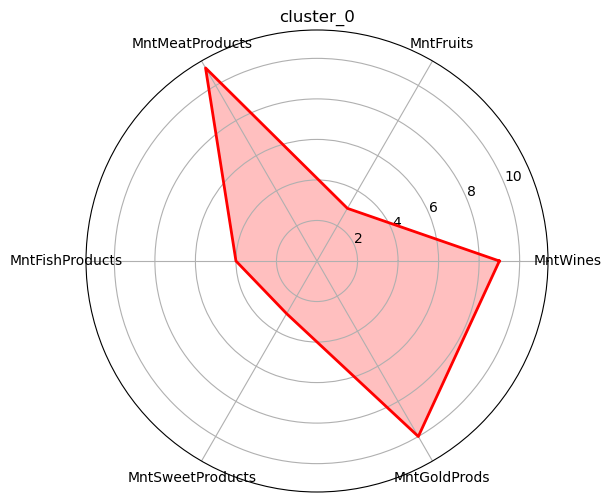

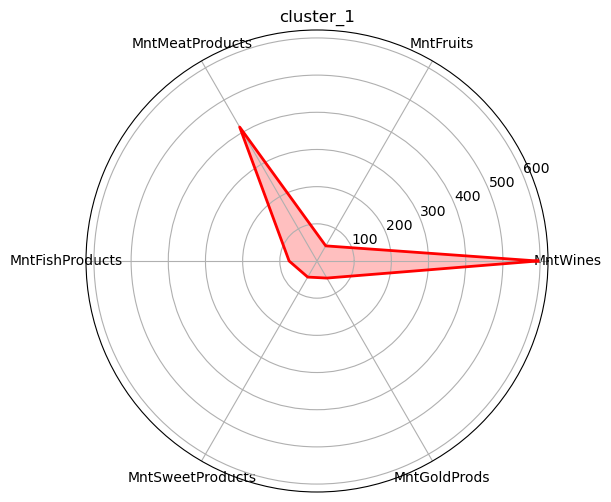

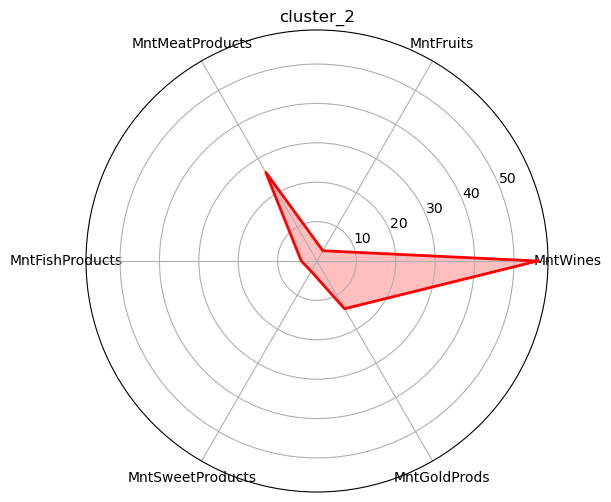

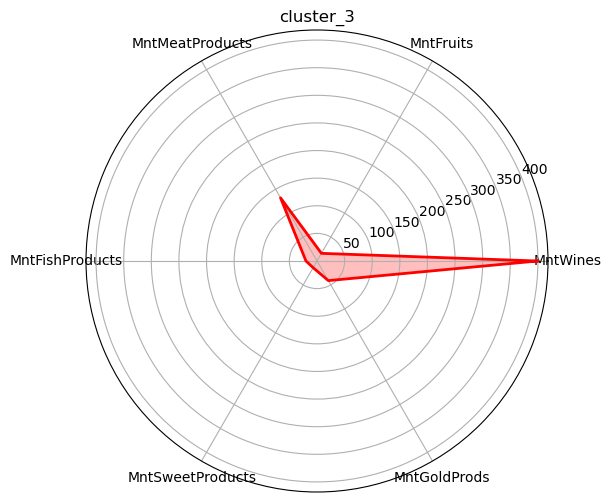

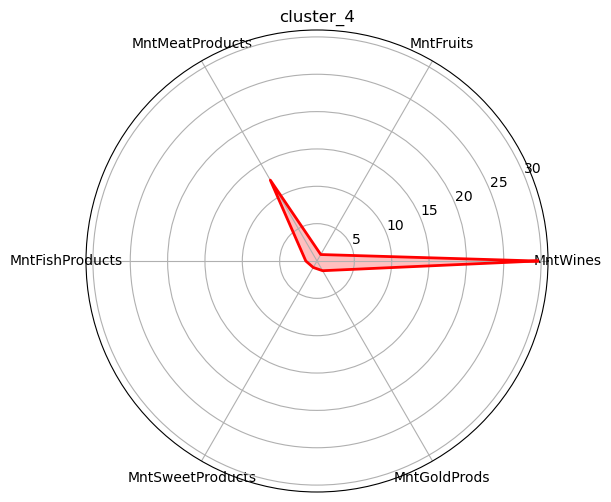

In [326]:
for elemento in grafico_mnt:
   stats= grafico_mnt[elemento].values.tolist()
   etiquetas = grafico_mnt.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [327]:
stats_list = []
leyenda_multi = []
for elemento in grafico_mnt:
   temp_stats= grafico_mnt[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

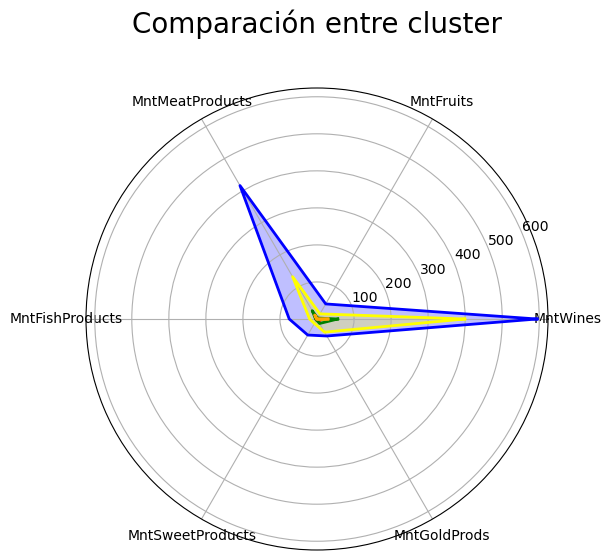

In [328]:
etiquetas_multi = grafico_mnt.index.to_list()
colores = ['red','blue', 'green', 'yellow', 'orange']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)

#### Gráfico Purchase

In [329]:
grafico_purchase = cluster_df.loc[cluster_df.index.str.contains('Purchase')]
grafico_purchase

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
NumDealsPurchases          2.0        1.0        2.0        2.0        0.0
NumWebPurchases            2.0        5.0        3.0        5.0        0.0
NumCatalogPurchases        0.0        5.0        1.0        3.0        0.0
NumStorePurchases          3.0        8.0        4.0        8.0        0.5

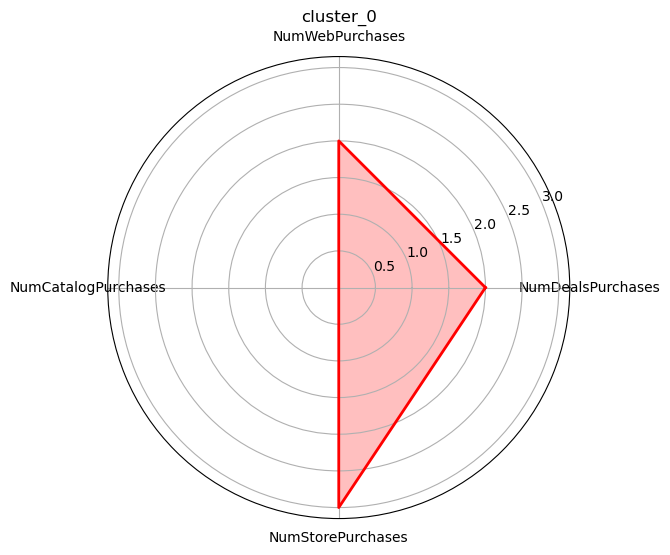

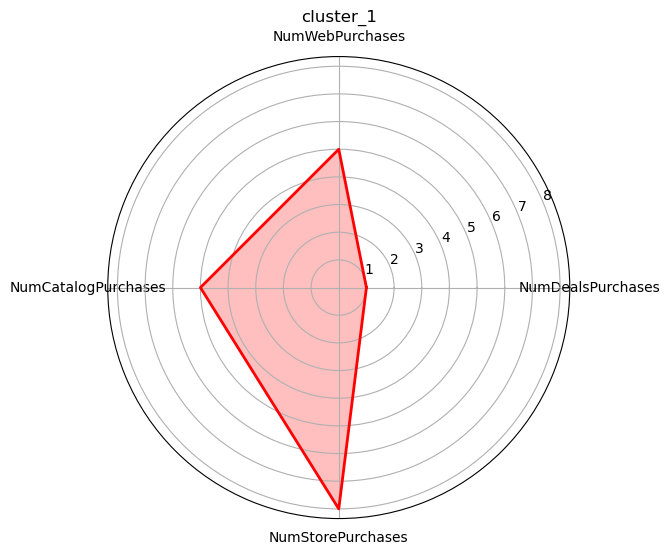

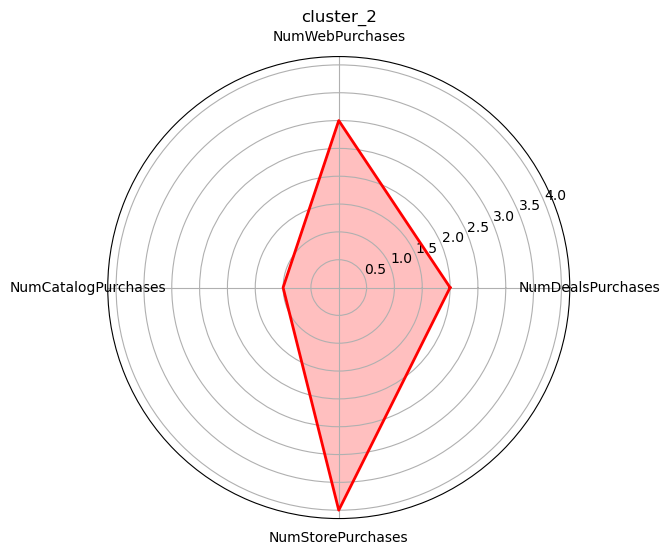

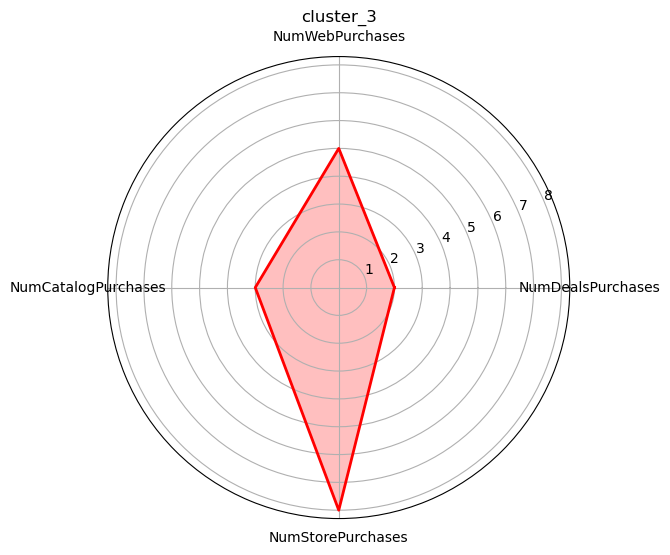

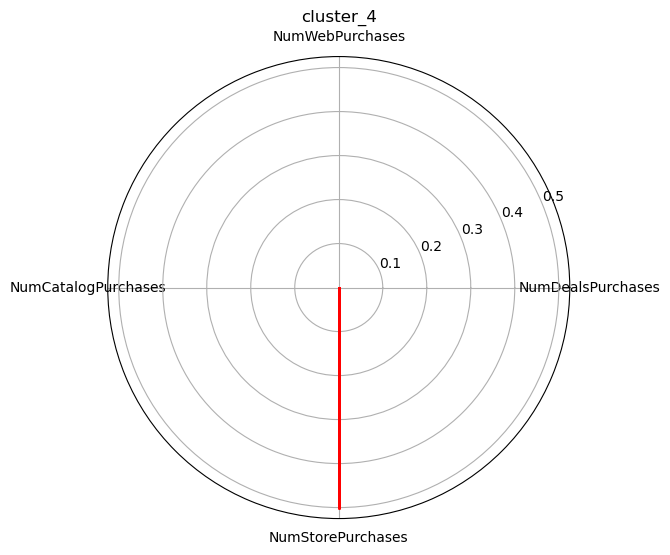

In [330]:
for elemento in grafico_mnt:
   stats= grafico_purchase[elemento].values.tolist()
   etiquetas = grafico_purchase.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [331]:
stats_list = []
leyenda_multi = []
for elemento in grafico_purchase:
   temp_stats= grafico_purchase[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

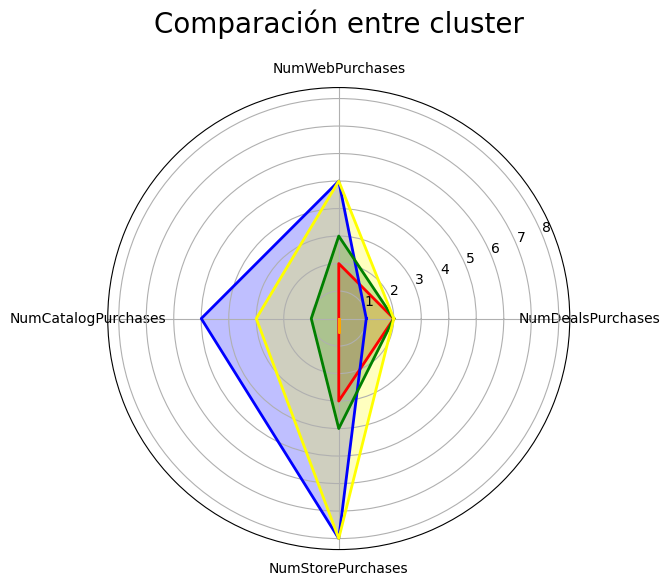

In [332]:
etiquetas_multi = grafico_purchase.index.to_list()
colores = ['red','blue', 'green', 'yellow', 'orange']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)

#### Gráfico Total

In [341]:
#cluster_df.loc['Income'] = cluster_df.loc['Income'] / 100
cluster_df.loc['Total_amount'] = cluster_df.loc['Total_amount'] / 10
grafico_total = cluster_df[cluster_df.index.to_series().str.contains('Total|age')]
grafico_total

cluster_0  cluster_1  cluster_2  cluster_3  cluster_4
age                  39.0       46.0       44.0       49.0       41.0
Total_amount          5.2      138.0       12.5       79.4        8.3
Total_purchase        7.0       20.0        9.0       20.0        1.5
Total_cmp             0.0        0.0        0.0        0.0        0.0

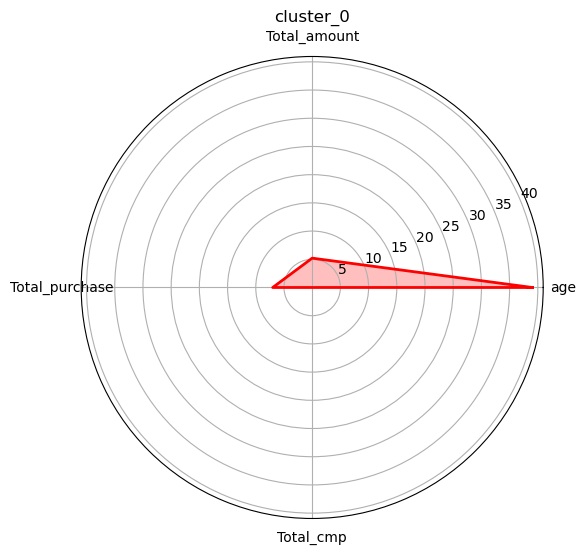

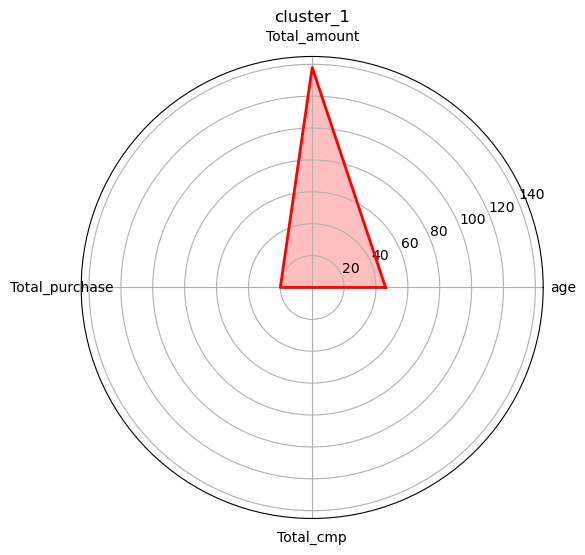

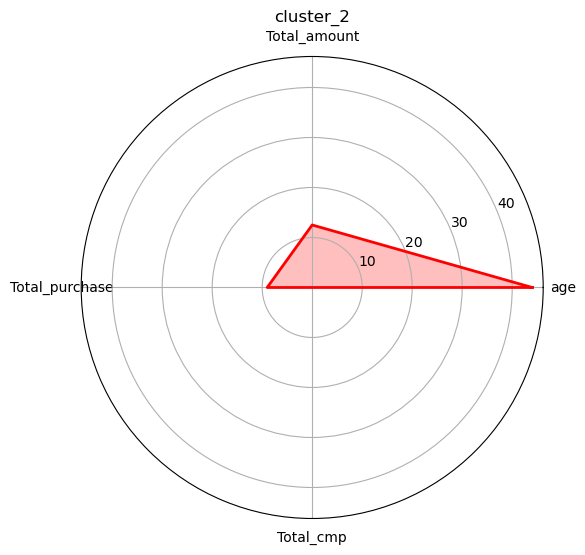

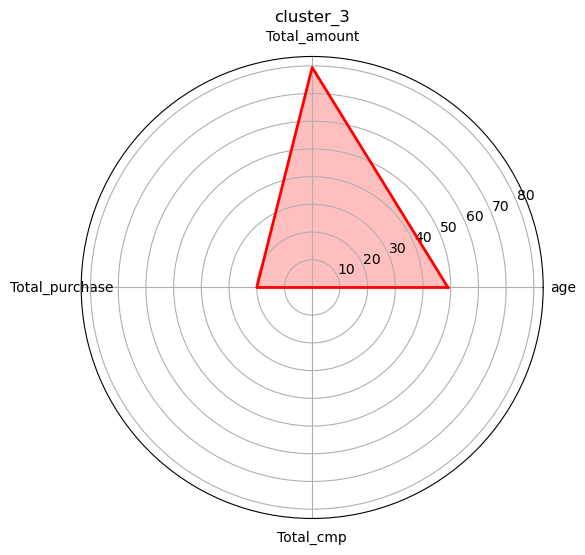

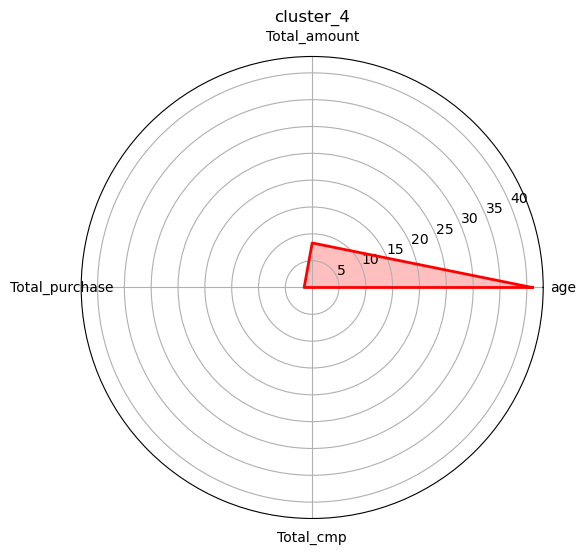

In [342]:
for elemento in grafico_total:
   stats= grafico_total[elemento].values.tolist()
   etiquetas = grafico_total.index.tolist()
   titulo = elemento
   crear_grafico_radar(stats,etiquetas, titulo)
   

In [343]:
stats_list = []
leyenda_multi = []
for elemento in grafico_total:
   temp_stats= grafico_total[elemento].values.tolist()
   temp_label = elemento
   stats_list.append(temp_stats)
   leyenda_multi.append(elemento)

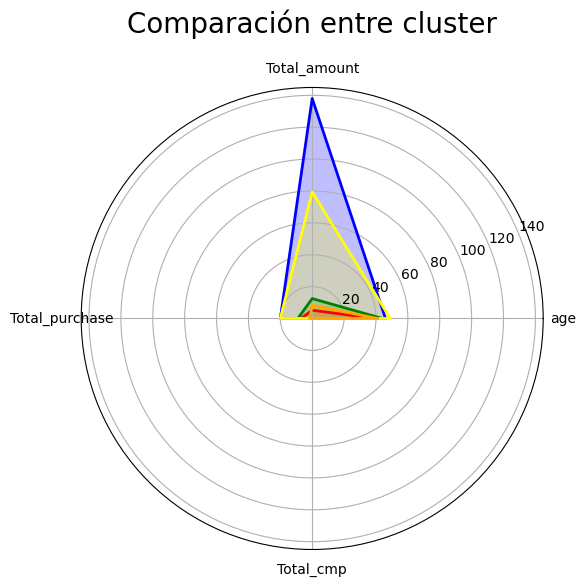

In [344]:
etiquetas_multi = grafico_total.index.to_list()
colores = ['red','blue', 'green', 'yellow', 'orange']

crear_grafico_radar_multiples(stats_list,etiquetas_multi,colores,'Comparación entre cluster', leyenda_multi)